In [277]:
import glob
import os

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib

import warnings
warnings.filterwarnings("ignore")

import yaml

%matplotlib inline

plt.rcParams["figure.figsize"] = [16, 10]

## Normalize JSON turnout data

https://vt.ncsbe.gov/RegStat/

In [904]:
ls -lah data/registration

total 1624
drwxr-xr-x  31 mookerji  staff   992B Aug 22 20:04 ./
drwxr-xr-x  17 mookerji  staff   544B Aug 15 22:47 ../
-rw-r--r--   1 mookerji  staff    26K Aug  7 18:35 02-25-2020.json
-rw-r--r--   1 mookerji  staff    26K Aug  7 18:34 02-29-2020.json
-rw-r--r--   1 mookerji  staff    26K Jul 27 22:11 03-03-2020.json
-rw-r--r--   1 mookerji  staff    26K Jul 27 22:11 03-07-2020.json
-rw-r--r--   1 mookerji  staff    26K Jul 27 22:10 03-14-2020.json
-rw-r--r--   1 mookerji  staff    26K Jul 27 22:09 03-21-2020.json
-rw-r--r--   1 mookerji  staff    26K Jul 27 22:08 03-28-2020.json
-rw-r--r--   1 mookerji  staff    27K Jul 27 22:07 04-04-2020.json
-rw-r--r--   1 mookerji  staff    27K Jul 27 22:06 04-11-2020.json
-rw-r--r--   1 mookerji  staff    27K Jul 27 22:06 04-18-2020.json
-rw-r--r--@  1 mookerji  staff    27K Jul 27 21:18 04-25-2020.json
-rw-r--r--@  1 mookerji  staff    27K Jul 27 21:18 05-02-2020.json

-rw-r--r--@  1 mookerji  staff    27K Jul 27 21:18 05-16-2020.json
-rw-r--r

In [649]:
glob.glob('data/registration/*.json')

['data/registration/03-14-2020.json',
 'data/registration/03-21-2020.json',
 'data/registration/08-01-2020.json',
 'data/registration/08-15-2020.json',
 'data/registration/07-11-2020.json',
 'data/registration/04-18-2020.json',
 'data/registration/07-25-2020.json',
 'data/registration/06-23-2020.json',
 'data/registration/07-04-2020.json',
 'data/registration/03-07-2020.json',
 'data/registration/02-25-2020.json',
 'data/registration/06-13-2020.json',
 'data/registration/08-22-2020.json',
 'data/registration/07-18-2020.json',
 'data/registration/05-09-2020.json',
 'data/registration/05-16-2020.json',
 'data/registration/08-08-2020.json',
 'data/registration/04-04-2020.json',
 'data/registration/05-02-2020.json',
 'data/registration/04-25-2020.json',
 'data/registration/06-20-2020.json',
 'data/registration/05-23-2020.json',
 'data/registration/03-28-2020.json',
 'data/registration/05-30-2020.json',
 'data/registration/06-27-2020.json',
 'data/registration/03-03-2020.json',
 'data/regis

In [650]:
PARTIES = ['registered.democrats(count)', 
           'registered.republicans(count)', 
           'registered.libertarians(count)', 
           'registered.green(count)', 
           'registered.constitution(count)', 
           'registered.unaffiliated(count)', 
           'registered.total(count)']

rename = {'Democrats': 'registered.democrats(count)', 
          'Republicans': 'registered.republicans(count)', 
          'Libertarians': 'registered.libertarians(count)', 
          'Green': 'registered.green(count)',
          'Constitution': 'registered.constitution(count)', 
          'Unaffiliated': 'registered.unaffiliated(count)', 
          'White': 'registered.white(count)', 
          'Black': 'registered.black(count)', 
          'AmericanIndian': 'registered.american_indian(count)',
          'Other': 'registered.other(count)', 
          'Hispanic': 'registered.hispanic(count)', 
          'Male': 'registered.male(count)', 
          'Female': 'registered.female(count)', 
          'UnDisclosedGender': 'registered.undisclosed_gender(count)', 
          'Total': 'registered.total(count)'}

def registrations_to_csv():
    files = glob.glob('data/registration/*.json')
    data = []
    for f in files:
        df = pd.read_json(f)
        df['date'] = pd.to_datetime(f.split('/')[2].rstrip('.json'))
        data.append(df.rename(columns=rename))
    return pd.concat(data)

In [651]:
registrations = registrations_to_csv()
registrations.to_csv('data/registrations2020.csv', index=False)
registrations.head()

CountyName  registered.democrats(count)  registered.republicans(count)  \
0   ALAMANCE                        36792                          33375   
1  ALEXANDER                         5242                          10930   
2  ALLEGHANY                         2194                           2704   
3      ANSON                        10111                           2478   
4       ASHE                         4539                           8082   

   registered.libertarians(count)  registered.green(count)  \
0                             556                       17   
1                              91                        1   
2                              33                        2   
3                              29                        7   
4                              76                        3   

   registered.constitution(count)  registered.unaffiliated(count)  \
0                              42                           31955   
1                              15                            7518   
2                               1                            2259   
3                              24                            3372   
4                               7                            5660   

   registered.white(count)  registered.black(count)  \
0                    70181                    21076   
1                    21612                      931   
2                     6666                       73   
3                     6656                     6818   
4                    17504                      103   

   registered.american_indian(count)  registered.other(count)  \
0                                258                    11222   
1                                 35                     1219   
2                                  7                      447   
3                                 27                     2520   
4                                 21                      739   

   registered.hispanic(count)  registered.male(count)  \
0                        3998                   44020   
1                         334                   11145   
2                         177                    3330   
3                          82                    6205   
4                         208                    8491   

   registered.female(count)  registered.undisclosed_gender(count)  \
0                     53978                                  4739   
1                     12006                                   646   
2                      3606                                   257   
3                      7558                                  2258   
4                      9511                                   365   

   registered.total(count)       date  
0                   102737 2020-03-14  
1                    23797 2020-03-14  
2                     7193 2020-03-14  
3                    16021 2020-03-14  
4                    18367 2020-03-14

In [8]:
registrations.columns

Index(['CountyName', 'registered.democrats(count)',
       'registered.republicans(count)', 'registered.libertarians(count)',
       'registered.green(count)', 'registered.constitution(count)',
       'registered.unaffiliated(count)', 'registered.white(count)',
       'registered.black(count)', 'registered.american_indian(count)',
       'registered.other(count)', 'registered.hispanic(count)',
       'registered.male(count)', 'registered.female(count)',
       'registered.undisclosed_gender(count)', 'registered.total(count)',
       'date'],
      dtype='object')

In [9]:
ls -lah data/changes/

total 10624
drwxr-xr-x   3 mookerji  staff    96B Aug  9 18:25 ./
drwxr-xr-x  17 mookerji  staff   544B Aug 14 21:47 ../
-rw-r--r--@  1 mookerji  staff   5.2M Aug  9 17:20 2020_party_change_list.csv


In [652]:
def parse_party_changes():
    rename = {'UNA': 'unaffiliated', 
          'DEM': 'democrats', 
          'REP': 'republicans', 
          'LIB': 'libertarians', 
          'CST': 'constitution', 
          'GRE': 'green'}
    changes_df = pd.read_csv('data/changes/2020_party_change_list.csv')
    changes_df['date'] = pd.to_datetime(changes_df.change_dt)
    changes_df.drop(labels=['change_dt', 'voter_reg_num', 'year_change', 'county_id'], axis=1, inplace=True)
    changes_df['party_from'] = changes_df['party_from'].apply(rename.get)
    changes_df['party_to'] = changes_df['party_to'].apply(rename.get)
    changes_df['event'] = changes_df['party_from'] +'-to-'+ changes_df['party_to']
    changes_df['county_name'] = changes_df[' county_name']
    # There must be a better way to do this...
    changes_df['net_democrats'] = 0
    changes_df['net_republicans'] = 0
    changes_df['net_unaffiliated'] = 0
    changes_df['net_other'] = 0
    for p in ['democrats', 'republicans', 'unaffiliated']:
        changes_df[f'net_{p}'] += -1*(changes_df['party_from'] == p).astype('int')
        changes_df[f'net_{p}'] += (changes_df['party_to'] == p).astype('int')
    for p in ['libertarians', 'green', 'constitution']: 
        changes_df['net_other'] += -1*(changes_df['party_from'] == p).astype('int')
        changes_df['net_other'] += (changes_df['party_to'] == p).astype('int')
    return changes_df.drop(labels=[' county_name'], axis=1)

In [113]:
party_changes = parse_party_changes()
party_changes.to_csv('data/party-changes-2020.csv')
party_changes

party_from      party_to       date                        event  \
0       unaffiliated     democrats 2020-01-13    unaffiliated-to-democrats   
1       unaffiliated     democrats 2020-01-13    unaffiliated-to-democrats   
2          democrats   republicans 2020-01-13     democrats-to-republicans   
3          democrats  unaffiliated 2020-01-13    democrats-to-unaffiliated   
4          democrats  unaffiliated 2020-01-13    democrats-to-unaffiliated   
...              ...           ...        ...                          ...   
110712   republicans  unaffiliated 2020-07-08  republicans-to-unaffiliated   
110713  unaffiliated   republicans 2020-07-08  unaffiliated-to-republicans   
110714     democrats   republicans 2020-07-08     democrats-to-republicans   
110715     democrats  unaffiliated 2020-07-08    democrats-to-unaffiliated   
110716     democrats  unaffiliated 2020-07-27    democrats-to-unaffiliated   

       county_name  net_democrats  net_republicans  net_unaffiliated  \
0         ALAMANCE              1                0                -1   
1         ALAMANCE              1                0                -1   
2         ALAMANCE             -1                1                 0   
3         ALAMANCE             -1                0                 1   
4         ALAMANCE             -1                0                 1   
...            ...            ...              ...               ...   
110712      YANCEY              0               -1                 1   
110713      YANCEY              0                1                -1   
110714      YANCEY             -1                1                 0   
110715      YANCEY             -1                0                 1   
110716      YANCEY             -1                0                 1   

        net_other  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
110712          0  
110713          0  
110714          0  
110715          0  
110716          0  

[110717 rows x 9 columns]

## Shapefile

In [696]:
def load_shapefile():
    nc_shapefile = "data/shapefiles/NC_Counties-shp/counties.shp"
    nc_shape = gpd.read_file(nc_shapefile).set_index('CO_NAME', drop=False).rename(columns={'CO_NAME': 'CountyName'})
    nc_shape['land.area(square_miles)'] = nc_shape['ACRES']/640.
    return nc_shape

nc_shape = load_shapefile()
nc_shape.head()

FID  OBJECTID      PERIMETER  CountyName CO_ABBR          ACRES  \
CO_NAME                                                                       
ROCKINGHAM    1       1.0  156472.984375  ROCKINGHAM    ROCK  366053.062500   
GUILFORD      2       2.0  166183.500000    GUILFORD    GUIL  420968.937500   
ALAMANCE      3       3.0  143114.546875    ALAMANCE    ALAM  278127.031250   
ALEXANDER     4       4.0  116938.171875   ALEXANDER    ALEX  168640.984375   
RANDOLPH      5       5.0  180894.171875    RANDOLPH    RAND  505667.968750   

               Shape_Leng    RO     SHAPE_Le_1    SHAPE_Area  \
CO_NAME                                                        
ROCKINGHAM  513361.787377  WSRO  194502.424760  1.594526e+10   
GUILFORD    545220.367738  WSRO  205797.586927  1.833739e+10   
ALAMANCE    469534.986553  WSRO  177272.968717  1.211521e+10   
ALEXANDER   383654.655146   MRO  144599.548259  7.345997e+09   
RANDOLPH    593483.622166  WSRO  223033.815060  2.202688e+10   

                                                     geometry  \
CO_NAME                                                         
ROCKINGHAM  POLYGON ((-8853514.087 4333890.334, -8854417.1...   
GUILFORD    POLYGON ((-8909472.546 4336065.305, -8906846.4...   
ALAMANCE    POLYGON ((-8853514.087 4333890.334, -8853463.1...   
ALEXANDER   POLYGON ((-9020123.382 4306915.833, -9017719.5...   
RANDOLPH    POLYGON ((-8910804.874 4289745.058, -8906021.2...   

            land.area(square_miles)  
CO_NAME                              
ROCKINGHAM               571.957910  
GUILFORD                 657.763965  
ALAMANCE                 434.573486  
ALEXANDER                263.501538  
RANDOLPH                 790.106201

## CVAP (estimate)

https://data.census.gov/cedsci/table?q=B05003&g=0400000US37,37.050000&tid=ACSDT5Y2018.B05003&vintage=2014&y=2018

In [12]:
ls -lah data/cvap/

total 16
drwxr-xr-x  10 mookerji  staff   320B Aug  9 14:37 ./
drwxr-xr-x  17 mookerji  staff   544B Aug 14 21:47 ../
-rw-r--r--@  1 mookerji  staff   6.0K Aug  9 14:33 .DS_Store
drwxr-xr-x@  8 mookerji  staff   256B Jul 28 18:18 productDownload_2020-07-28T211825/
drwxr-xr-x@  8 mookerji  staff   256B Aug  7 22:00 productDownload_2020-08-08T010026/
drwx------@  8 mookerji  staff   256B Aug  9 14:03 productDownload_2020-08-09T170305/
drwx------@  8 mookerji  staff   256B Aug  9 14:25 productDownload_2020-08-09T172511/
drwx------@  8 mookerji  staff   256B Aug  9 14:33 productDownload_2020-08-09T173308/
drwx------@  8 mookerji  staff   256B Aug  9 14:35 productDownload_2020-08-09T173516/
drwx------@  8 mookerji  staff   256B Aug  9 14:37 productDownload_2020-08-09T173721/


In [13]:
cols = ['Estimate!!Total!!Female!!18 years and over!!Foreign born!!Naturalized U.S. citizen',
        'Estimate!!Total!!Female!!18 years and over!!Native',
        'Estimate!!Total!!Male!!18 years and over!!Foreign born!!Naturalized U.S. citizen',
        'Estimate!!Total!!Male!!18 years and over!!Native',
       ] 

def read_cvap_data(filename, col='cvap.all_races(count)'):
    cvap_df = pd.read_csv(filename, skiprows=1)
    cvap_df['CountyName'] = cvap_df['Geographic Area Name'].apply(lambda t: t.replace(' County, North Carolina', '').upper())
    cvap_df.set_index('CountyName', inplace=True, drop=False)
    cvap_df[col] = cvap_df[cols].sum(axis=1)
    cvap_df.drop('NORTH CAROLINA', inplace=True)
    return cvap_df[[col, 'CountyName']]

In [14]:
filename = 'data/cvap/productDownload_2020-07-28T211825/ACSDT5Y2018.B05003_data_with_overlays_2020-07-28T211821.csv'
cvap_df = read_cvap_data(filename)
cvap_df.to_csv('data/cvap2020_all_races.csv', index=False)
cvap_df

cvap.all_races(count) CountyName
CountyName                                  
MITCHELL                    11930   MITCHELL
GREENE                      15373     GREENE
CHOWAN                      11146     CHOWAN
CALDWELL                    63099   CALDWELL
CATAWBA                    115407    CATAWBA
...                           ...        ...
DAVIDSON                   122830   DAVIDSON
HERTFORD                    18989   HERTFORD
PENDER                      44201     PENDER
WATAUGA                     46205    WATAUGA
TYRRELL                      3507    TYRRELL

[100 rows x 2 columns]

In [15]:
cvap_aa_df = read_cvap_data('data/cvap/productDownload_2020-08-08T010026/ACSDT5Y2018.B05003B_data_with_overlays_2020-08-08T005955.csv', 
                            col='cvap.black_aa(count)' )
cvap_aa_df.to_csv('data/cvap2020_black_aa.csv', index=False)
cvap_aa_df.head()

cvap.black_aa(count) CountyName
CountyName                                 
MITCHELL                      53   MITCHELL
GREENE                      6093     GREENE
CHOWAN                      3774     CHOWAN
CALDWELL                    2933   CALDWELL
CATAWBA                     9832    CATAWBA

In [16]:
cvap_white_df = read_cvap_data('data/cvap/productDownload_2020-08-09T170305/ACSDT5Y2018.B05003H_data_with_overlays_2020-08-09T170249.csv', 
                               col='cvap.white(count)' )
cvap_white_df.to_csv('data/cvap2020_white.csv', index=False)
cvap_white_df.head()

cvap.white(count) CountyName
CountyName                              
MITCHELL                11452   MITCHELL
GREENE                   8262     GREENE
CHOWAN                   7057     CHOWAN
CALDWELL                58071   CALDWELL
CATAWBA                 96398    CATAWBA

In [17]:
cvap = cvap_df.join(cvap_aa_df, rsuffix='_r').drop(['CountyName_r'], axis=1).join(cvap_white_df, rsuffix='_r').drop(['CountyName_r'], axis=1)
cvap['pct_cvap.black_aa(%)'] = 100*cvap['cvap.black_aa(count)']/cvap['cvap.all_races(count)']
cvap['pct_cvap.white(%)'] = 100*cvap['cvap.white(count)']/cvap['cvap.all_races(count)']
cvap['pct_cvap.all_races.within_state(%)'] = 100*cvap['cvap.all_races(count)']/cvap['cvap.all_races(count)'].sum()
cvap.to_csv('data/cvap2020.csv', index=False)
cvap.head()

cvap.all_races(count) CountyName  cvap.black_aa(count)  \
CountyName                                                           
MITCHELL                    11930   MITCHELL                    53   
GREENE                      15373     GREENE                  6093   
CHOWAN                      11146     CHOWAN                  3774   
CALDWELL                    63099   CALDWELL                  2933   
CATAWBA                    115407    CATAWBA                  9832   

            cvap.white(count)  pct_cvap.black_aa(%)  pct_cvap.white(%)  \
CountyName                                                               
MITCHELL                11452              0.444258          95.993294   
GREENE                   8262             39.634424          53.743576   
CHOWAN                   7057             33.859681          63.314193   
CALDWELL                58071              4.648251          92.031569   
CATAWBA                 96398              8.519414          83.528729   

            pct_cvap.all_races.within_state(%)  
CountyName                                      
MITCHELL                              0.160930  
GREENE                                0.207374  
CHOWAN                                0.150354  
CALDWELL                              0.851173  
CATAWBA                               1.556781

In [18]:
cvap.to_csv('data/cvap2020.csv', index=False)

In [324]:
cvap.columns

Index(['cvap.all_races(count)', 'CountyName', 'cvap.black_aa(count)',
       'cvap.white(count)', 'pct_cvap.black_aa(%)', 'pct_cvap.white(%)',
       'pct_cvap.all_races.within_state(%)'],
      dtype='object')

## Post-processed

In [694]:
nc_shape['land.area(square_miles)']

CO_NAME
ROCKINGHAM     571.957910
GUILFORD       657.763965
ALAMANCE       434.573486
ALEXANDER      263.501538
RANDOLPH       790.106201
                  ...    
ROWAN          523.566357
LINCOLN        307.111279
MECKLENBURG    549.385059
CABARRUS       364.636035
GASTON         363.585132
Name: land.area(square_miles), Length: 100, dtype: float64

In [708]:
def add_cvap(registrations, cvap, nc_shape):    
    cvap_cols = ['cvap.all_races(count)', 'CountyName', 'cvap.black_aa(count)',
                 'cvap.white(count)', 'pct_cvap.black_aa(%)', 'pct_cvap.white(%)',
                 'pct_cvap.all_races.within_state(%)']
    joined = registrations.join(cvap[cvap_cols], on='CountyName', rsuffix='_r').drop(labels='CountyName_r', axis=1)
    cols = ['CountyName', 'land.area(square_miles)']
    joined = joined.join(nc_shape[cols], on='CountyName', rsuffix='_r').drop(labels='CountyName_r', axis=1)
    joined['cvap.density(count/squaremiles)'] = joined['cvap.all_races(count)']/joined['land.area(square_miles)']
    for c in PARTIES:
        joined[c.replace('count', '%').replace('registered', 'registered_within_county_cvap')] = 100*joined[c]/joined['cvap.all_races(count)']
    parties = ['democrats', 'republicans', 'libertarians', 
               'green', 'constitution', 'unaffiliated']
    parties_col = {('registered_within_county_cvap.' + party + '(%)'): party for party in parties}
    winners = pd.DataFrame({'most_registrants(party)': joined[parties_col].idxmax(axis=1).apply(parties_col.get), 
                            'most_registered(%)': joined[parties_col].max(axis=1)})
    joined['pct_registered.within_race_cvap.black_aa(%)'] = 100*joined['registered.black(count)'] / joined['cvap.black_aa(count)']
    joined['pct_registered.among_all_races_cvap.black_aa(%)'] = 100*joined['registered.black(count)'] / joined['cvap.all_races(count)']
    joined['pct_registered.among_registered.black_aa(%)'] = 100*joined['registered.black(count)'] / joined['registered.total(count)']
    joined['pct_registered.within_race_cvap.white(%)'] = 100*joined['registered.white(count)'] / joined['cvap.white(count)']
    joined['pct_registered.among_all_races_cvap.white(%)'] = 100*joined['registered.white(count)'] / joined['cvap.all_races(count)']
    joined['pct_registered.among_registered.white(%)'] = 100*joined['registered.white(count)'] / joined['registered.total(count)']
    return pd.concat([joined, winners], axis=1)

In [706]:
joined = add_cvap(registrations, cvap, nc_shape)
joined.T

0   \
CountyName                                                  ALAMANCE   
registered.democrats(count)                                    36792   
registered.republicans(count)                                  33375   
registered.libertarians(count)                                   556   
registered.green(count)                                           17   
registered.constitution(count)                                    42   
registered.unaffiliated(count)                                 31955   
registered.white(count)                                        70181   
registered.black(count)                                        21076   
registered.american_indian(count)                                258   
registered.other(count)                                        11222   
registered.hispanic(count)                                      3998   
registered.male(count)                                         44020   
registered.female(count)                                       53978   
registered.undisclosed_gender(count)                            4739   
registered.total(count)                                       102737   
date                                             2020-03-14 00:00:00   
cvap.all_races(count)                                         115973   
cvap.black_aa(count)                                           23370   
cvap.white(count)                                              84558   
pct_cvap.black_aa(%)                                         20.1512   
pct_cvap.white(%)                                            72.9118   
pct_cvap.all_races.within_state(%)                           1.56442   
land.area(square_miles)                                      434.573   
cvap.density(count/squaremiles)                              266.866   
registered_within_county_cvap.democrats(%)                   31.7246   
registered_within_county_cvap.republicans(%)                 28.7783   
registered_within_county_cvap.libertarians(%)               0.479422   
registered_within_county_cvap.green(%)                     0.0146586   
registered_within_county_cvap.constitution(%)              0.0362153   
registered_within_county_cvap.unaffiliated(%)                27.5538   
registered_within_county_cvap.total(%)                        88.587   
pct_registered.within_race_cvap.black_aa(%)                   90.184   
pct_registered.among_all_races_cvap.black_aa(%)              18.1732   
pct_registered.among_registered.black_aa(%)                  20.5145   
pct_registered.within_race_cvap.white(%)                     82.9975   
pct_registered.among_all_races_cvap.white(%)                 60.5149   
pct_registered.among_registered.white(%)                     68.3113   
most_registrants(party)                                    democrats   
most_registered(%)                                           31.7246   

                                                                  1   \
CountyName                                                 ALEXANDER   
registered.democrats(count)                                     5242   
registered.republicans(count)                                  10930   
registered.libertarians(count)                                    91   
registered.green(count)                                            1   
registered.constitution(count)                                    15   
registered.unaffiliated(count)                                  7518   
registered.white(count)                                        21612   
registered.black(count)                                          931   
registered.american_indian(count)                                 35   
registered.other(count)                                         1219   
registered.hispanic(count)                                       334   
registered.male(count)                                         11145   
registered.female(count)                                       12006   
registered.undisclosed_gender(cou

In [707]:
joined.to_csv('data/2020_registrations_demographics.csv', index=False)

In [709]:
def compute_changes(joined):
    diffs = []
    for county, df in joined.groupby('CountyName'):
        dfg = df.sort_values('date').set_index('date').drop(['CountyName', 'most_registrants(party)'], axis=1)
        dfh = dfg - dfg.iloc[0]
        dfh['CountyName'] = county
        # Constant across all dates, but keep them around for convenience
        fixed_demographics = [
            'cvap.all_races(count)', 
            'cvap.black_aa(count)', 'pct_cvap.black_aa(%)',
            'cvap.white(count)', 'pct_cvap.white(%)',
            'pct_cvap.all_races.within_state(%)', 'cvap.density(count/squaremiles)',
        ]
        for d in fixed_demographics: 
            dfh[d] = dfg[d]
        diffs.append(dfh)
    changes = pd.concat(diffs)
    parties = ['democrats', 'republicans', 'libertarians', 
               'green', 'constitution', 'unaffiliated']
    parties_col = {('registered_within_county_cvap.' + party + '(%)'): party for party in parties}
    winners = pd.DataFrame({'most_new_registrants(party)': changes[parties_col].idxmax(axis=1).apply(parties_col.get), 
                            'most_new_registered(%)': changes[parties_col].max(axis=1)})
    return pd.concat([changes, winners], axis=1)

In [710]:
changes = compute_changes(joined)
changes.head()

registered.democrats(count)  registered.republicans(count)  \
date                                                                     
2020-02-25                          0.0                            0.0   
2020-02-29                          1.0                            6.0   
2020-03-03                         58.0                           23.0   
2020-03-07                         59.0                           22.0   
2020-03-14                        113.0                           36.0   

            registered.libertarians(count)  registered.green(count)  \
date                                                                  
2020-02-25                             0.0                      0.0   
2020-02-29                             0.0                      0.0   
2020-03-03                             0.0                      0.0   
2020-03-07                            -1.0                     -1.0   
2020-03-14                            -2.0                     -1.0   

            registered.constitution(count)  registered.unaffiliated(count)  \
date                                                                         
2020-02-25                             0.0                             0.0   
2020-02-29                             0.0                           -22.0   
2020-03-03                             0.0                             1.0   
2020-03-07                             0.0                            -3.0   
2020-03-14                            -2.0                             8.0   

            registered.white(count)  registered.black(count)  \
date                                                           
2020-02-25                      0.0                      0.0   
2020-02-29                      6.0                    -10.0   
2020-03-03                     70.0                      7.0   
2020-03-07                     66.0                      6.0   
2020-03-14                    116.0                     26.0   

            registered.american_indian(count)  registered.other(count)  ...  \
date                                                                    ...   
2020-02-25                                0.0                      0.0  ...   
2020-02-29                                1.0                    -12.0  ...   
2020-03-03                                1.0                      4.0  ...   
2020-03-07                                1.0                      3.0  ...   
2020-03-14                                2.0                      8.0  ...   

            pct_registered.within_race_cvap.black_aa(%)  \
date                                                      
2020-02-25                                     0.000000   
2020-02-29                                    -0.042790   
2020-03-03                                     0.029953   
2020-03-07                                     0.025674   
2020-03-14                                     0.111254   

            pct_registered.among_all_races_cvap.black_aa(%)  \
date                                                          
2020-02-25                                         0.000000   
2020-02-29                                        -0.008623   
2020-03-03                                         0.006036   
2020-03-07                                         0.005174   
2020-03-14                                         0.022419   

            pct_registered.among_registered.black_aa(%)  \
date                                                      
2020-02-25                                     0.000000   
2020-02-29                                    -0.006749   
2020-03-03                                    -0.009571   
2020-03-07                                    -0.009346   
2020-03-14                                    -0.005051   

            pct_registered.within_race_cvap.white(%)  \
date                                                   
2020-02-25                                  0.000000   
2020-02

In [711]:
changes.to_csv('data/2020_registrations_demographics_weekly_changes.csv', index=False)

In [712]:
last_date = changes.index[-1]
last_date

Timestamp('2020-08-22 00:00:00')

In [713]:
changes.T

date                                            2020-02-25   2020-02-29  \
registered.democrats(count)                              0            1   
registered.republicans(count)                            0            6   
registered.libertarians(count)                           0            0   
registered.green(count)                                  0            0   
registered.constitution(count)                           0            0   
registered.unaffiliated(count)                           0          -22   
registered.white(count)                                  0            6   
registered.black(count)                                  0          -10   
registered.american_indian(count)                        0            1   
registered.other(count)                                  0          -12   
registered.hispanic(count)                               0            0   
registered.male(count)                                   0           -8   
registered.female(count)                                 0            2   
registered.undisclosed_gender(count)                     0           -9   
registered.total(count)                                  0          -15   
cvap.all_races(count)                               115973       115973   
cvap.black_aa(count)                                 23370        23370   
cvap.white(count)                                    84558        84558   
pct_cvap.black_aa(%)                               20.1512      20.1512   
pct_cvap.white(%)                                  72.9118      72.9118   
pct_cvap.all_races.within_state(%)                 1.56442      1.56442   
land.area(square_miles)                                  0            0   
cvap.density(count/squaremiles)                    266.866      266.866   
registered_within_county_cvap.democrats(%)               0   0.00086227   
registered_within_county_cvap.republicans(%)             0   0.00517362   
registered_within_county_cvap.libertarians(%)            0            0   
registered_within_county_cvap.green(%)                   0            0   
registered_within_county_cvap.constitution(%)            0            0   
registered_within_county_cvap.unaffiliated(%)            0   -0.0189699   
registered_within_county_cvap.total(%)                   0    -0.012934   
pct_registered.within_race_cvap.black_aa(%)              0   -0.0427899   
pct_registered.among_all_races_cvap.black_aa(%)          0   -0.0086227   
pct_registered.among_registered.black_aa(%)              0  -0.00674862   
pct_registered.within_race_cvap.white(%)                 0   0.00709572   
pct_registered.among_all_races_cvap.white(%)             0   0.00517362   
pct_registered.among_registered.white(%)                 0    0.0158379   
most_registered(%)                                       0   0.00086227   
CountyName                                        ALAMANCE     ALAMANCE   
most_new_registrants(party)                      democrats  republicans   
most_new_registered(%)                                   0   0.00517362   

date                                             2020-03-03  2020-03-07  \
registered.democrats(count)                              58          59   
registered.republicans(count)                            23          22   
registered.libertarians(count)                            0          -1   
registered.green(count)                                   0          -1   
registered.constitution(count)                            0           0   
registered.unaffiliated(count)                            1          -3   
registered.white(count)                                  70          66   
registered.black(count)                                   7           6   
registered.american_indian(count)                         1           1   
registered.other(count)                                   4           3   
registered.hispanic(count)                               11           9   
registered.male(count)  

## Percentage Change vs CVAP

In [661]:
def plot_latest_change(changes, party, size_axis='cvap.all_races(count)'):
    dat = changes.T[last_date].T
    ax = dat.plot.scatter(x=size_axis, y=party, logx=True)
    dat[[size_axis, party,'CountyName']].apply(lambda row: ax.text(*row),axis=1)    

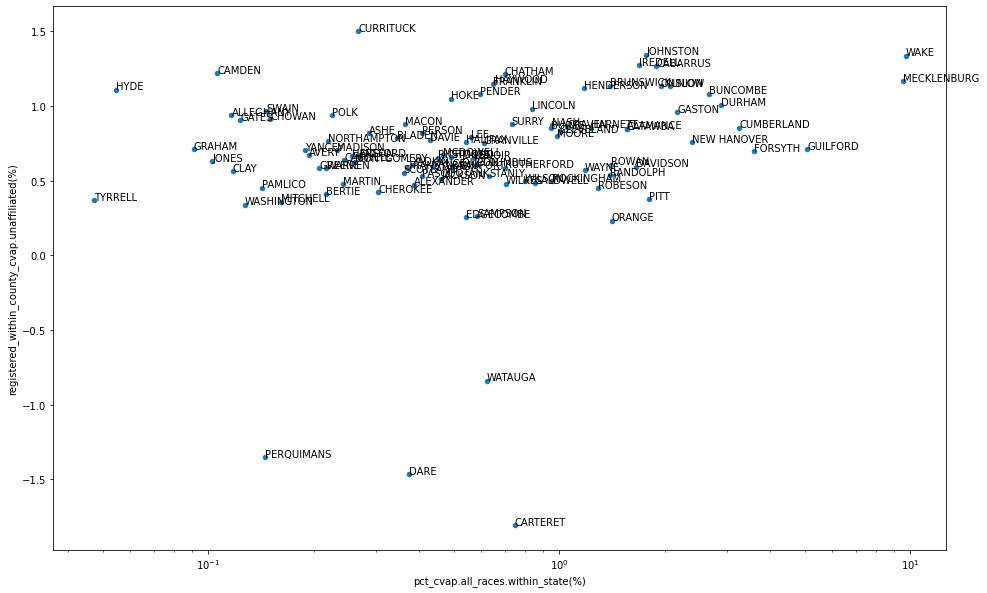

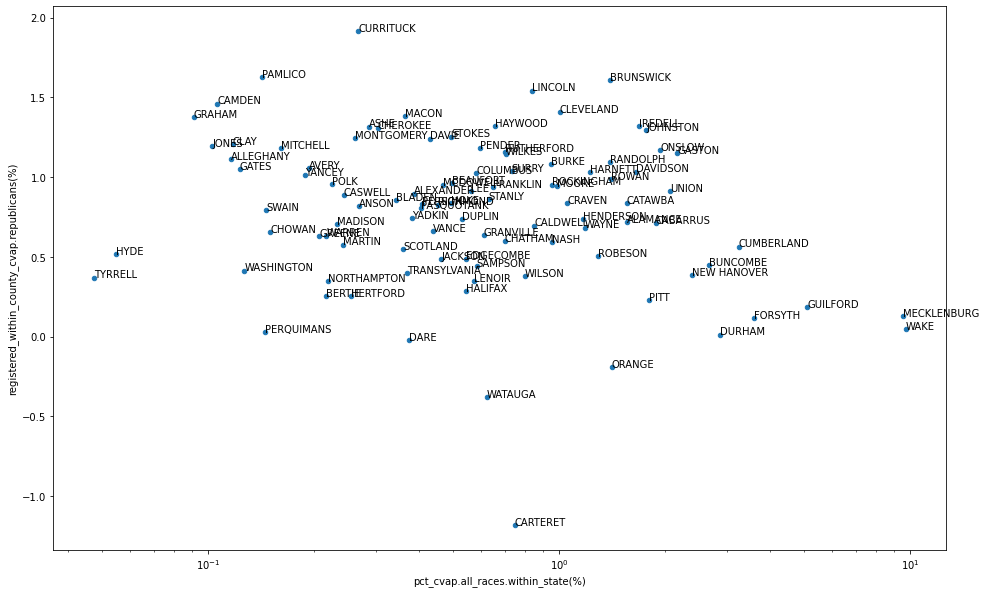

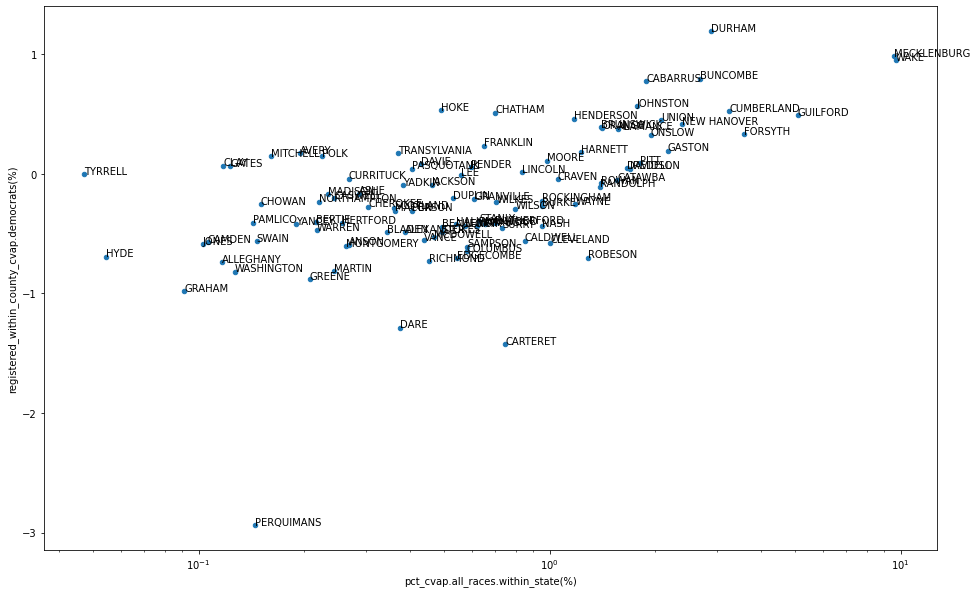

In [662]:
size_axis = 'pct_cvap.all_races.within_state(%)'
plot_latest_change(changes, 'registered_within_county_cvap.unaffiliated(%)', size_axis)
plot_latest_change(changes, 'registered_within_county_cvap.republicans(%)', size_axis)
plot_latest_change(changes, 'registered_within_county_cvap.democrats(%)', size_axis)

In [663]:
cols = ['CountyName', 
        'most_new_registered(%)', 'most_new_registrants(party)', 
        'pct_cvap.all_races.within_state(%)', 
        'registered_within_county_cvap.total(%)']
latest = changes[cols].T[last_date].T
latest

CountyName most_new_registered(%) most_new_registrants(party)  \
date                                                                       
2020-08-22   ALAMANCE               0.849336                unaffiliated   
2020-08-22  ALEXANDER               0.897691                 republicans   
2020-08-22  ALLEGHANY                1.11137                 republicans   
2020-08-22      ANSON               0.817657                 republicans   
2020-08-22       ASHE                 1.3161                 republicans   
...               ...                    ...                         ...   
2020-08-22      WAYNE                0.68299                 republicans   
2020-08-22     WILKES                1.14488                 republicans   
2020-08-22     WILSON               0.497554                unaffiliated   
2020-08-22     YADKIN               0.741735                 republicans   
2020-08-22     YANCEY                1.01284                 republicans   

           pct_cvap.all_races.within_state(%)  \
date                                            
2020-08-22                            1.56442   
2020-08-22                            0.38619   
2020-08-22                           0.116522   
2020-08-22                           0.268913   
2020-08-22                           0.286989   
...                                       ...   
2020-08-22                            1.18504   
2020-08-22                            0.70577   
2020-08-22                           0.799792   
2020-08-22                           0.381914   
2020-08-22                           0.189123   

           registered_within_county_cvap.total(%)  
date                                               
2020-08-22                                1.96166  
2020-08-22                                 0.9431  
2020-08-22                                1.30817  
2020-08-22                               0.892902  
2020-08-22                                1.99295  
...                                           ...  
2020-08-22                                1.03473  
2020-08-22                                1.40673  
2020-08-22                               0.618991  
2020-08-22                                1.31746  
2020-08-22                                1.31954  

[100 rows x 5 columns]

In [664]:
latest['most_new_registrants(party)'].value_counts()

republicans     63
unaffiliated    32
democrats        2
green            2
constitution     1
Name: most_new_registrants(party), dtype: int64

In [88]:
colormap = {'registered_within_county_cvap.unaffiliated(%)': 'gray', 
            'registered_within_county_cvap.republicans(%)': 'red', 
            'registered_within_county_cvap.constitution(%)': 'black',
            'registered_within_county_cvap.green(%)': 'black', 
            'registered_within_county_cvap.democrats(%)': 'blue'}

def get_color(party): 
    return colormap.get('registered_within_county_cvap.' + party + '(%)')

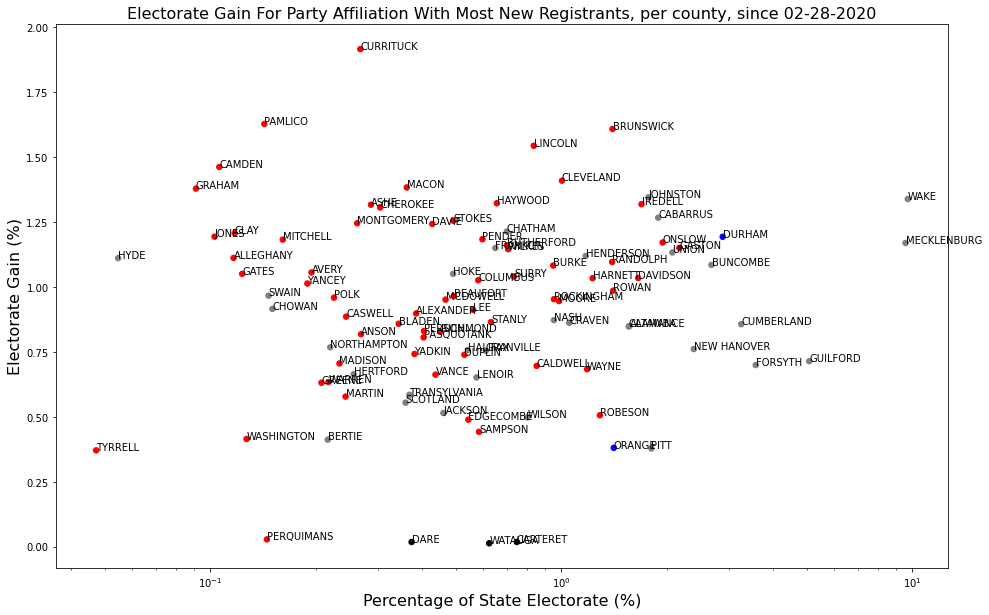

In [665]:
ax = latest.plot.scatter(x='pct_cvap.all_races.within_state(%)', 
                         y='most_new_registered(%)', 
                         c=latest['most_new_registrants(party)'].apply(get_color).values, s=30, logx=True)                               
latest[['pct_cvap.all_races.within_state(%)','most_new_registered(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
font_size = 16
ax.set_title(f'Electorate Gain For Party Affiliation With Most New Registrants, per county, since 02-28-2020', fontsize=font_size)
ax.set_ylabel('Electorate Gain (%)', fontsize=font_size)
ax.set_xlabel('Percentage of State Electorate (%)', fontsize=font_size)
ax.get_figure().savefig('assets/images/pct-new-electorate-change-vs-population.png', bbox_inches='tight')
ax

date
2020-08-08    Text(1.5644161393064597, 1.5727798711769196, '...
2020-08-08    Text(0.3861904896157264, 0.6496908728911137, '...
2020-08-08    Text(0.11652217853577297, 1.0071775874044988, ...
2020-08-08    Text(0.2689128998738868, 0.7173313268121433, '...
2020-08-08    Text(0.2869888108761947, 1.5605170387779026, '...
                                    ...                        
2020-08-08    Text(1.1850378400311554, 0.7843003335268435, '...
2020-08-08    Text(0.7057698982393658, 0.9690366972477023, '...
2020-08-08    Text(0.7997916144230122, 0.5633327711249763, '...
2020-08-08    Text(0.3819143226099565, 1.0172365074879934, '...
2020-08-08    Text(0.18912259123310224, 1.0627674750356704, ...
Length: 100, dtype: object

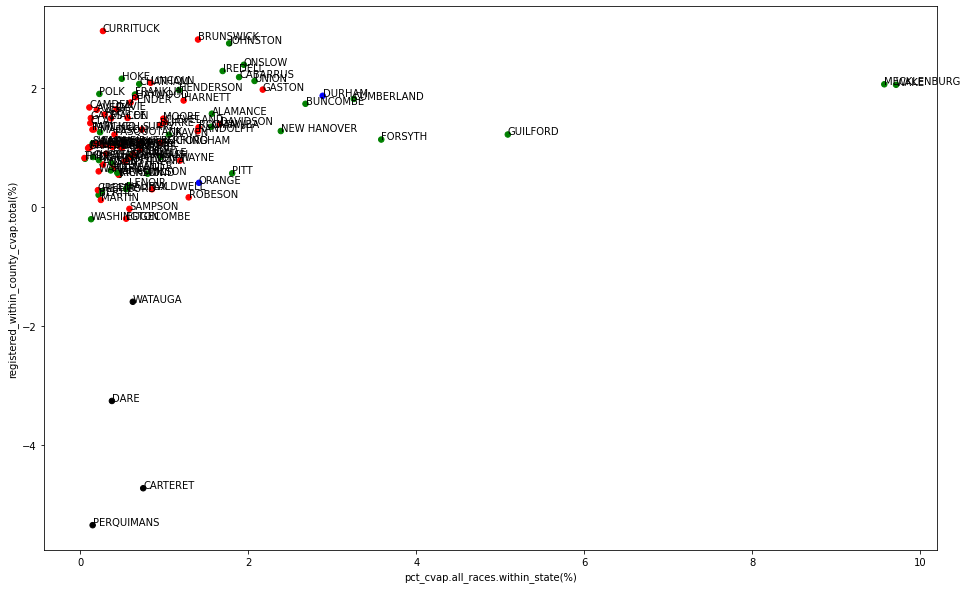

In [817]:
recent = changes.T[last_date].T
ax = recent.plot.scatter(x='pct_cvap.all_races.within_state(%)', 
                         y='registered_within_county_cvap.total(%)', 
                         c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)                               
recent[['pct_cvap.all_races.within_state(%)','registered_within_county_cvap.total(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)

0     Text(1.5644161393064597, 31.9177739646297, 'AL...
1     Text(0.3861904896157264, 38.63914212861085, 'A...
2     Text(0.11652217853577297, 32.032877981014124, ...
3     Text(0.2689128998738868, 50.268372209681466, '...
4     Text(0.2869888108761947, 39.01762632197415, 'A...
                            ...                        
95    Text(1.1850378400311554, 33.31512026317886, 'W...
96    Text(0.7057698982393658, 42.190366972477065, '...
97    Text(0.7997916144230122, 46.17473435655254, 'W...
98    Text(0.3819143226099565, 47.022463972873695, '...
99    Text(0.18912259123310224, 35.44935805991441, '...
Length: 100, dtype: object

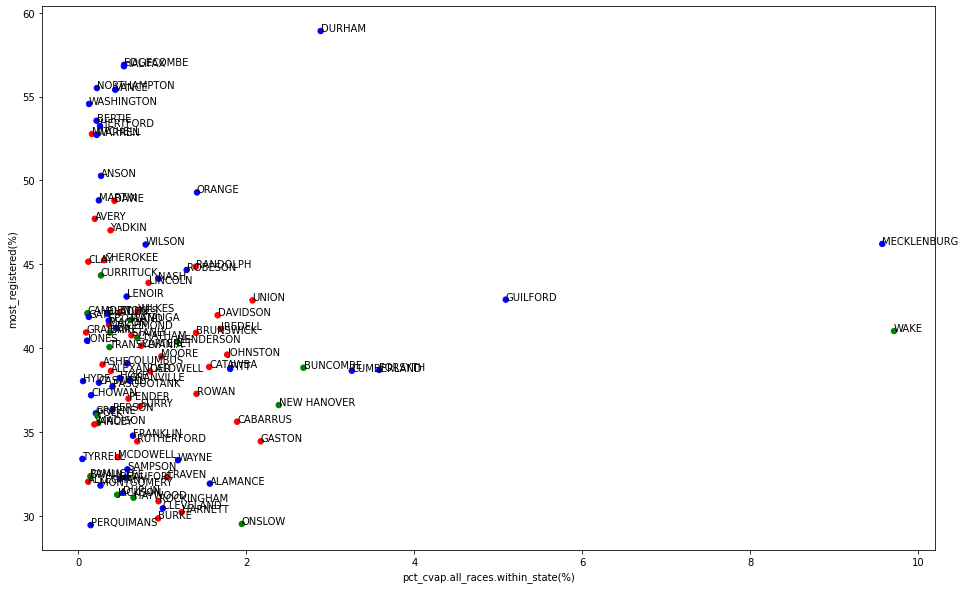

In [461]:
recent = joined[joined.date == last_date]
ax = recent.plot.scatter(x='pct_cvap.all_races.within_state(%)', 
                         y='most_registered(%)', 
                         c=recent['most_registrants(party)'].apply(get_color).values, s=30)                               
recent[['pct_cvap.all_races.within_state(%)','most_registered(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)

## Individual Counties

In [666]:
def generate_state_registrations(changes):
    plt.figure()
    ax = changes.reset_index().groupby('date')[PARTIES].sum().plot()
    ax.set_title(f'Cumulative New Voter Registrations since 02-28-2020, Statewide' )
    ax.set_ylabel('Net Registrations (count)')
    ax.get_figure().savefig('assets/images/statewide-registrations-by-party.png', bbox_inches='tight')
    plt.close(ax.get_figure())
    
def generate_county_registrations(changes):
    for county_name, county_data in changes.groupby('CountyName'):
        plt.figure()
        ax = county_data[PARTIES].plot()
        ax.set_title(f'Cumulative New Voter Registrations since 02-28-2020, {county_name.title()} County' )
        ax.set_ylabel('Net Registrations (count)')
        ax.get_figure().savefig('assets/images/county-registration-by-party/' + county_name.lower() + '.png', bbox_inches='tight')
        plt.close(ax.get_figure())

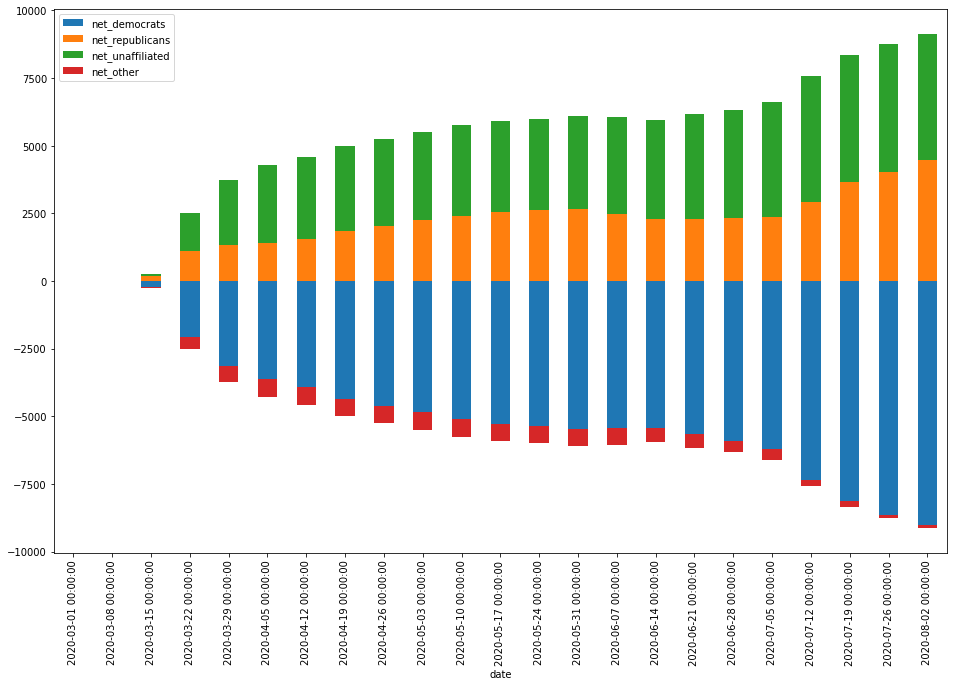

In [334]:
party_changes[party_changes.date >= '2020-02-28'].groupby(pd.Grouper(key='date', freq='W'))[cols].sum().cumsum().plot.bar(stacked=True)

In [596]:
#plt.figure()
#ax = changes.reset_index().groupby('date')[PARTIES].sum().plot()
#weekly = party_changes[party_changes.date >= '2020-02-28'].groupby(pd.Grouper(key='date', freq='W'))[cols].sum().cumsum()
#weekly.plot.bar(stacked=True, ax=ax)
#weekly.cumsum().plot.bar(stacked=True)
#gg.plot.bar(stacked=True, color=['DeepSkyBlue', 'Tomato', 'LightGray', 'mediumseagreen'], ax=ax)
#ax.set_title(f'Cumulative New Voter Registrations since 02-28-2020, Statewide' )
#ax.set_ylabel('Net Registrations (count)')
#ax
#plt.figure()
#gg = party_changes[party_changes.date >= '2020-02-28'].groupby(pd.Grouper(key='date', freq='W'))[cols].sum().cumsum()
#ax = gg.plot.bar(stacked=True, color=['DeepSkyBlue', 'Tomato', 'LightGray', 'mediumseagreen'])
#ax.set_title('Cumulative Party Affiliation Changes, since 02-28-2020')
#ax.set_ylabel('Net Change (count)')
#ax.set_xlabel('Date')
#ax.get_figure().savefig('assets/images/cumulative-party-affiliation-changes.png', bbox_inches='tight')
#ax

In [290]:
generate_state_registrations(changes)
generate_county_registrations(changes)

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

In [1080]:
def make_counties_manifest():
    manifest = {'counties': []}
    for county_name, county_data in changes.groupby('CountyName'):
        k =  county_name.lower().replace(' ', '_')
        image_name = 'assets/images/county-registration-by-party/' + k + '.png'
        change_name = 'assets/images/county-registration-changes/' + k + '.png'
        cumul_name = 'assets/images/cumulative-county-registration-changes/' + k + '.png'
        joined_name = 'assets/images/county-registration-and-changes-by-party/' + k + '.png'
        manifest['counties'].append({'county_name': k, 
                                     'party_registration_graph': image_name, 
                                     'party_change_graph': change_name, 
                                     'party_cumulative_change_graph': cumul_name,
                                     'party_registration_changes_graph': joined_name})
    return manifest

def make_state_manifest():
    manifest = {'state': {}}
    manifest['state']['party_registration_graph'] = 'assets/images/statewide-registrations-by-party.png'
    manifest['state']['party_new_electorate_per_county_graph'] = 'assets/images/pct-new-electorate-change-vs-population.png'
    manifest['state']['party_registration_changes_graph'] = 'assets/images/weekly-party-affiliation-changes.png'
    manifest['state']['party_cumulative_registration_changes_graph'] = 'assets/images/cumulative-party-affiliation-changes.png'
    manifest['state']['statewide_registrations_changes_by_party'] = 'assets/images/statewide-registrations-changes-by-party.png'
    manifest['state']['statewide_registrations_by_county_density'] = 'assets/images/statewide-registrations-by-county-density.png'
    manifest['state']['statewide_vbm_requests_by_demographic'] = 'assets/images/statewide-vbm-requests-by-demographic.png'
    manifest['state']['statewide_vbm_requests_by_county'] = 'assets/images/statewide-vbm-requests-by-county.png'
    return manifest

In [1081]:
with open('_data/counties.yml', 'w+') as f:
    f.write(yaml.dump(make_counties_manifest()))
    
with open('_data/state.yml', 'w+') as f:
    f.write(yaml.dump(make_state_manifest()))

In [310]:
changes.T[last_date].T.set_index('CountyName').sort_values('cvap.all_races(count)')

registered.democrats(count) registered.republicans(count)  \
CountyName                                                              
TYRRELL                               0                            13   
HYDE                                -26                            20   
GRAHAM                              -67                            86   
JONES                               -43                            82   
CAMDEN                              -42                           101   
...                                 ...                           ...   
CUMBERLAND                         1199                          1302   
FORSYTH                             808                           221   
GUILFORD                           1696                           632   
MECKLENBURG                        6736                           978   
WAKE                               6412                           291   

            registered.libertarians(count) registered.green(count)  \
CountyName                                                           
TYRRELL                                  0                       0   
HYDE                                     1                       0   
GRAHAM                                  -4                       0   
JONES                                    7                       1   
CAMDEN                                  -3                       1   
...                                    ...                     ...   
CUMBERLAND                              92                      17   
FORSYTH                                 36                      10   
GUILFORD                                53                      29   
MECKLENBURG                            186                     100   
WAKE                                   141                      64   

            registered.constitution(count) registered.unaffiliated(count)  \
CountyName                                                                  
TYRRELL                                  1                             13   
HYDE                                     0                             44   
GRAHAM                                   2                             43   
JONES                                    0                             45   
CAMDEN                                   0                             93   
...                                    ...                            ...   
CUMBERLAND                              33                           1970   
FORSYTH                                 20                           1763   
GUILFORD                                20                           2558   
MECKLENBURG                             63                           8028   
WAKE                                    55                           9163   

            registered.white(count) registered.black(count)  \
CountyName                                                    
TYRRELL                           4                       3   
HYDE                              5                      -4   
GRAHAM                           31                       0   
JONES                            30                      -1   
CAMDEN                           69                      -1   
...                             ...                     ...   
CUMBERLAND                      596                     874   
FORSYTH                        -237                      94   
GUILFORD                        -78                     500   
MECKLENBURG                    2194                    2464   
WAKE                           1729                     778   

            registered.american_indian(count) registered.other(count)  ...  \
CountyName                                                             ...   
TYRRELL                                     0                      20  ...   
HYDE                                        0                      38  ...   
GRAHAM           

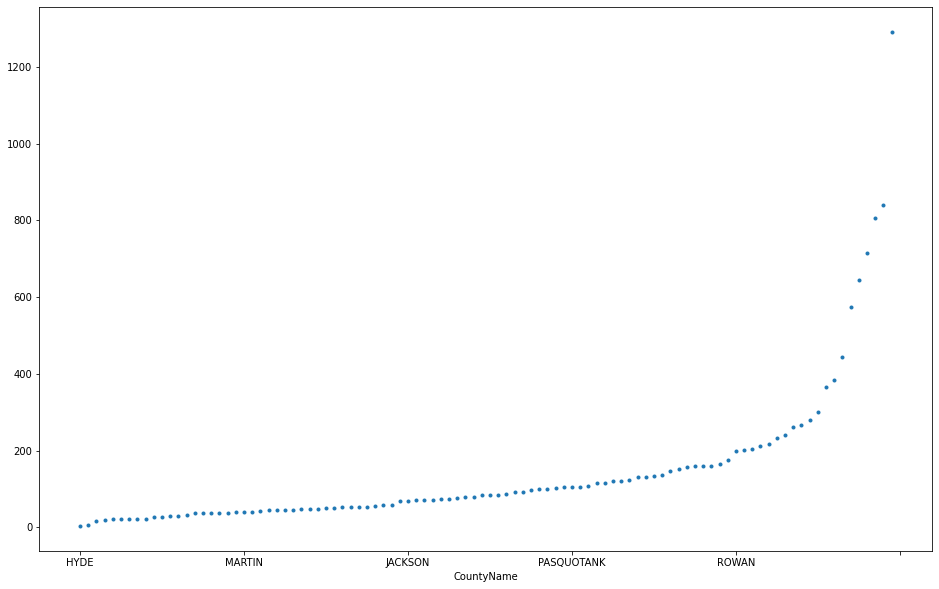

In [744]:
recent['cvap.density(count/squaremiles)'].sort_values().plot(style='.')

In [767]:
changes.T

date                                            2020-02-25   2020-02-29  \
registered.democrats(count)                              0            1   
registered.republicans(count)                            0            6   
registered.libertarians(count)                           0            0   
registered.green(count)                                  0            0   
registered.constitution(count)                           0            0   
registered.unaffiliated(count)                           0          -22   
registered.white(count)                                  0            6   
registered.black(count)                                  0          -10   
registered.american_indian(count)                        0            1   
registered.other(count)                                  0          -12   
registered.hispanic(count)                               0            0   
registered.male(count)                                   0           -8   
registered.female(count)                                 0            2   
registered.undisclosed_gender(count)                     0           -9   
registered.total(count)                                  0          -15   
cvap.all_races(count)                               115973       115973   
cvap.black_aa(count)                                 23370        23370   
cvap.white(count)                                    84558        84558   
pct_cvap.black_aa(%)                               20.1512      20.1512   
pct_cvap.white(%)                                  72.9118      72.9118   
pct_cvap.all_races.within_state(%)                 1.56442      1.56442   
land.area(square_miles)                                  0            0   
cvap.density(count/squaremiles)                    266.866      266.866   
registered_within_county_cvap.democrats(%)               0   0.00086227   
registered_within_county_cvap.republicans(%)             0   0.00517362   
registered_within_county_cvap.libertarians(%)            0            0   
registered_within_county_cvap.green(%)                   0            0   
registered_within_county_cvap.constitution(%)            0            0   
registered_within_county_cvap.unaffiliated(%)            0   -0.0189699   
registered_within_county_cvap.total(%)                   0    -0.012934   
pct_registered.within_race_cvap.black_aa(%)              0   -0.0427899   
pct_registered.among_all_races_cvap.black_aa(%)          0   -0.0086227   
pct_registered.among_registered.black_aa(%)              0  -0.00674862   
pct_registered.within_race_cvap.white(%)                 0   0.00709572   
pct_registered.among_all_races_cvap.white(%)             0   0.00517362   
pct_registered.among_registered.white(%)                 0    0.0158379   
most_registered(%)                                       0   0.00086227   
CountyName                                        ALAMANCE     ALAMANCE   
most_new_registrants(party)                      democrats  republicans   
most_new_registered(%)                                   0   0.00517362   

date                                             2020-03-03  2020-03-07  \
registered.democrats(count)                              58          59   
registered.republicans(count)                            23          22   
registered.libertarians(count)                            0          -1   
registered.green(count)                                   0          -1   
registered.constitution(count)                            0           0   
registered.unaffiliated(count)                            1          -3   
registered.white(count)                                  70          66   
registered.black(count)                                   7           6   
registered.american_indian(count)                         1           1   
registered.other(count)                                   4           3   
registered.hispanic(count)                               11           9   
registered.male(count)  

In [776]:
recent['cvap.density(count/squaremiles)'].sort_values()

CountyName
HYDE           2.94009
TYRRELL        5.75838
JONES          16.0676
PAMLICO        18.8233
SWAIN          20.1266
                ...   
FORSYTH        644.266
DURHAM         715.989
NEW HANOVER    805.316
WAKE           840.707
MECKLENBURG    1291.35
Name: cvap.density(count/squaremiles), Length: 100, dtype: object

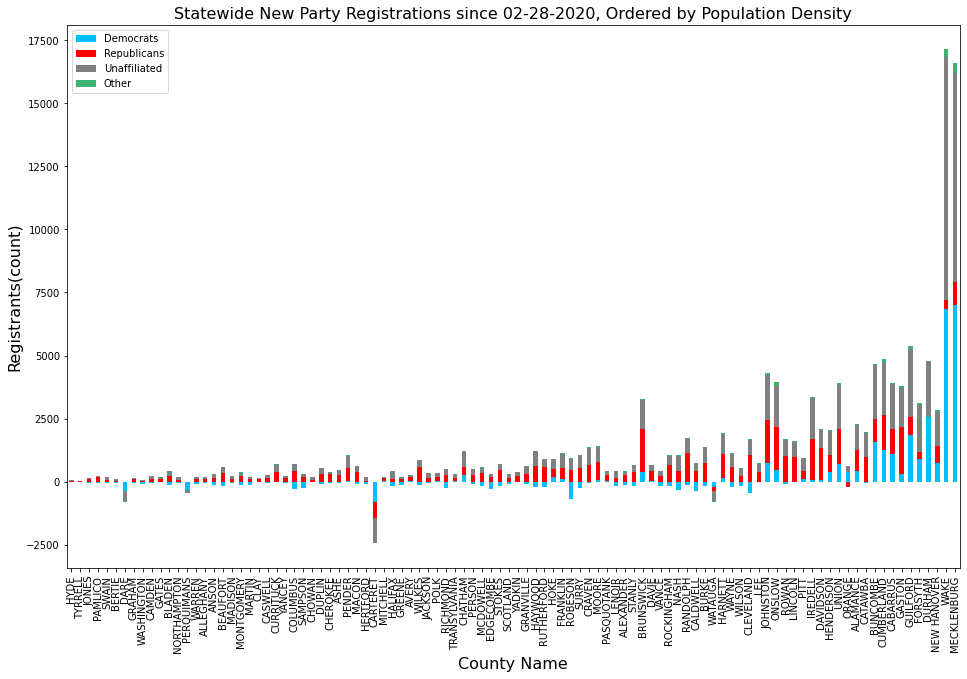

In [783]:
def plot_density_current_registrations(changes):
    recent = changes.T[last_date].T.set_index('CountyName')
    cols = ['registered.libertarians(count)','registered.green(count)','registered.constitution(count)']
    recent['registered.other(count)'] = recent[cols].sum(axis=1)
    recent = recent.drop(columns=cols).sort_values('cvap.density(count/squaremiles)')
    to_plot = {'registered.democrats(count)': 'Democrats',
               'registered.republicans(count)': 'Republicans',
               'registered.unaffiliated(count)': 'Unaffiliated',
               'registered.other(count)': 'Other'}
    ax = recent[to_plot].rename(columns=to_plot)[to_plot.values()].plot.bar(stacked=True, color=['DeepSkyBlue', 'Red', 'Gray', 'mediumseagreen'])
    #bx = recent['cvap.density(count/squaremiles)'].sort_values().plot(style='.', ax=ax, secondary_y=True, rot=90, color='gray')
    #bx.set_ylim(bottom=-225)
    fontsize=16
    ax.set_title('Statewide New Party Registrations since 02-28-2020, Ordered by Population Density', fontsize=fontsize)
    ax.set_ylabel('Registrants(count)', fontsize=fontsize)
    ax.set_xlabel('County Name', fontsize=fontsize)
    return ax

ax = plot_density_current_registrations(changes)
ax.get_figure().savefig('assets/images/statewide-registrations-by-county-density.png', bbox_inches='tight')

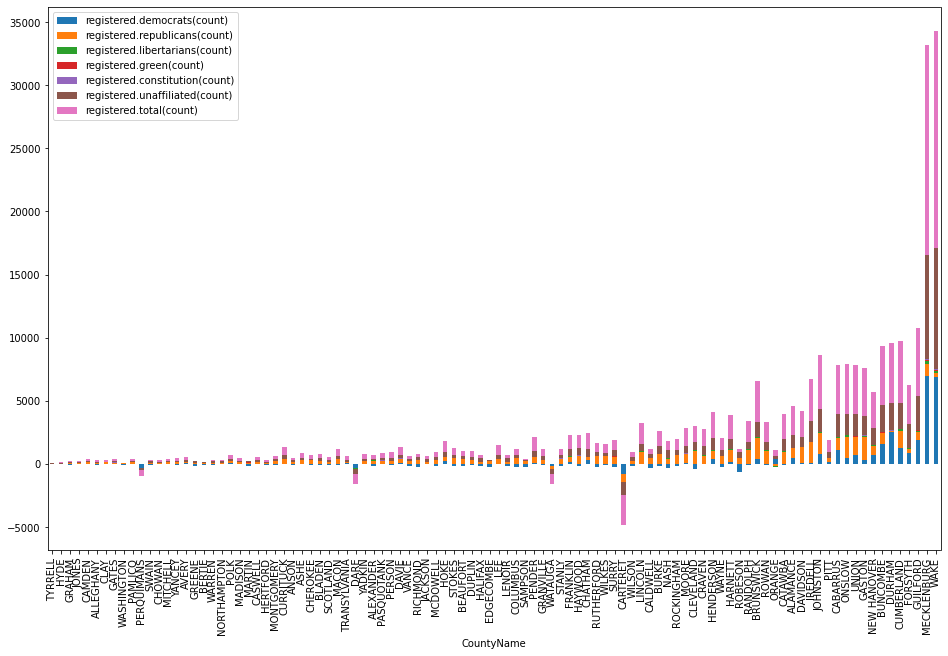

In [668]:
recent = changes.T[last_date].T.set_index('CountyName').sort_values('cvap.all_races(count)')
recent[PARTIES].plot.bar(stacked=True)

## Demographic Breakdowns

In [303]:
recent = changes.T[last_date].T
recent.head().T

date                                               2020-08-15   2020-08-15  \
registered.democrats(count)                               386         -137   
registered.republicans(count)                             762          210   
registered.libertarians(count)                             15            9   
registered.green(count)                                     3            2   
registered.constitution(count)                              2            5   
registered.unaffiliated(count)                            924          121   
registered.white(count)                                   188          -69   
registered.black(count)                                   221           -3   
registered.american_indian(count)                           5            0   
registered.other(count)                                  1678          282   
registered.hispanic(count)                                171           11   
registered.male(count)                                    255          -15   
registered.female(count)                                  401          -29   
registered.undisclosed_gender(count)                     1436          254   
registered.total(count)                                  2092          210   
cvap.all_races(count)                                  115973        28629   
cvap.black_aa(count)                                    23370         1760   
cvap.white(count)                                       84558        25940   
pct_cvap.black_aa(%)                                  20.1512      6.14761   
pct_cvap.white(%)                                     72.9118      90.6074   
pct_cvap.all_races.within_state(%)                    1.56442      0.38619   
registered_within_county_cvap.democrats(%)           0.332836    -0.478536   
registered_within_county_cvap.republicans(%)         0.657049     0.733522   
registered_within_county_cvap.libertarians(%)        0.012934    0.0314367   
registered_within_county_cvap.green(%)             0.00258681   0.00698592   
registered_within_county_cvap.constitution(%)      0.00172454    0.0174648   
registered_within_county_cvap.unaffiliated(%)        0.796737     0.422648   
registered_within_county_cvap.total(%)                1.80387     0.733522   
pct_registered.within_race_cvap.black_aa(%)          0.945657    -0.170455   
pct_registered.among_all_races_cvap.black_aa(%)      0.190562   -0.0104789   
pct_registered.among_registered.black_aa(%)         -0.198964   -0.0468124   
pct_registered.within_race_cvap.white(%)             0.222333    -0.265998   
pct_registered.among_all_races_cvap.white(%)         0.162107    -0.241014   
pct_registered.among_registered.white(%)             -1.18538     -1.08664   
most_registered(%)                                   0.332836     0.733522   
CountyName                                           ALAMANCE    ALEXANDER   
most_new_registrants(party)                      unaffiliated  republicans   
most_new_registered(%)                               0.796737     0.733522   

date                                              2020-08-15   2020-08-15  \
registered.democrats(count)                              -66         -112   
registered.republicans(count)                             81          133   
registered.libertarians(count)                            -3            1   
registered.green(count)                                    2            1   
registered.constitution(count)                             1           -1   
registered.unaffiliated(count)                            75          117   
registered.white(count)                                    3           12   
registered.black(count)                                    2          -30   
registered.american_indian(count)                          1            1   
registered.other(count)                                   84          156   
registered.hispanic(count)                                 5            3   
registered.male(count)           

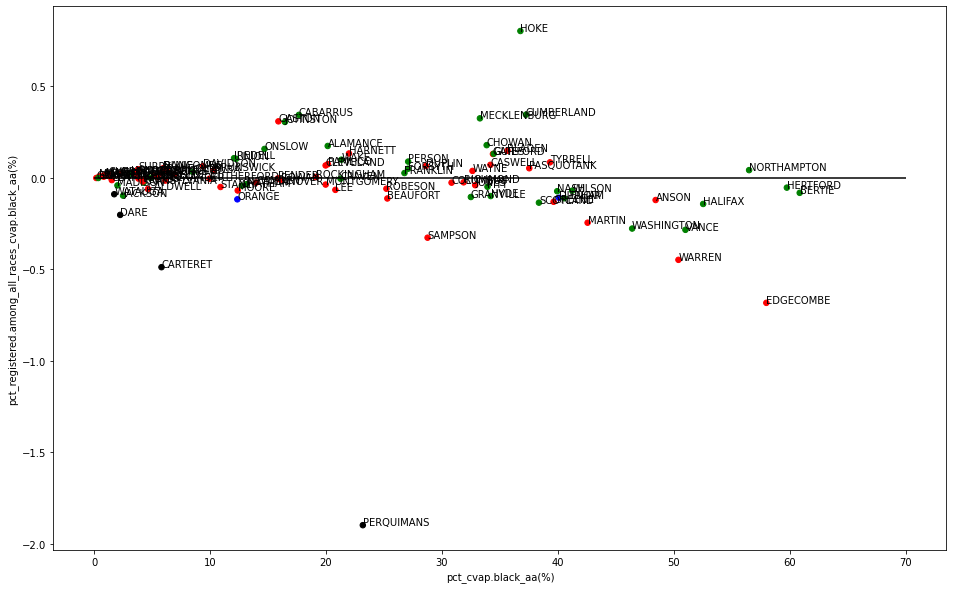

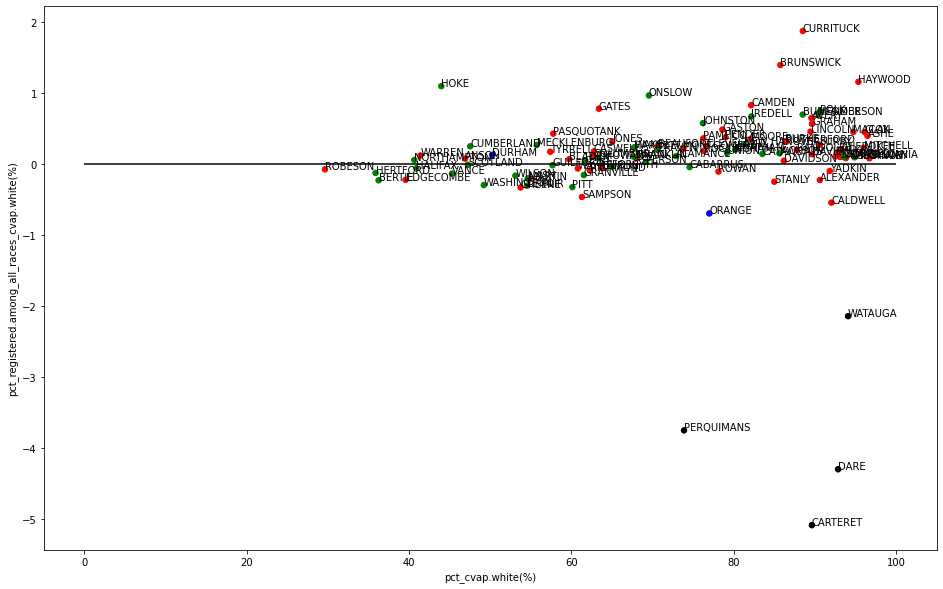

In [852]:
ax = recent.plot.scatter(y='pct_registered.among_all_races_cvap.black_aa(%)', 
                    x='pct_cvap.black_aa(%)', 
                    c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)
recent[['pct_cvap.black_aa(%)','pct_registered.among_all_races_cvap.black_aa(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
ax.hlines(0, 0, 70)
ax.get_figure().savefig('images/august2020_pct_registered_black_aa_vs_cvap_black_aa.png')

ax = recent.plot.scatter(y='pct_registered.among_all_races_cvap.white(%)', 
                    x='pct_cvap.white(%)', 
                    c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)
recent[['pct_cvap.white(%)','pct_registered.among_all_races_cvap.white(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
ax.hlines(0, 0, 100)

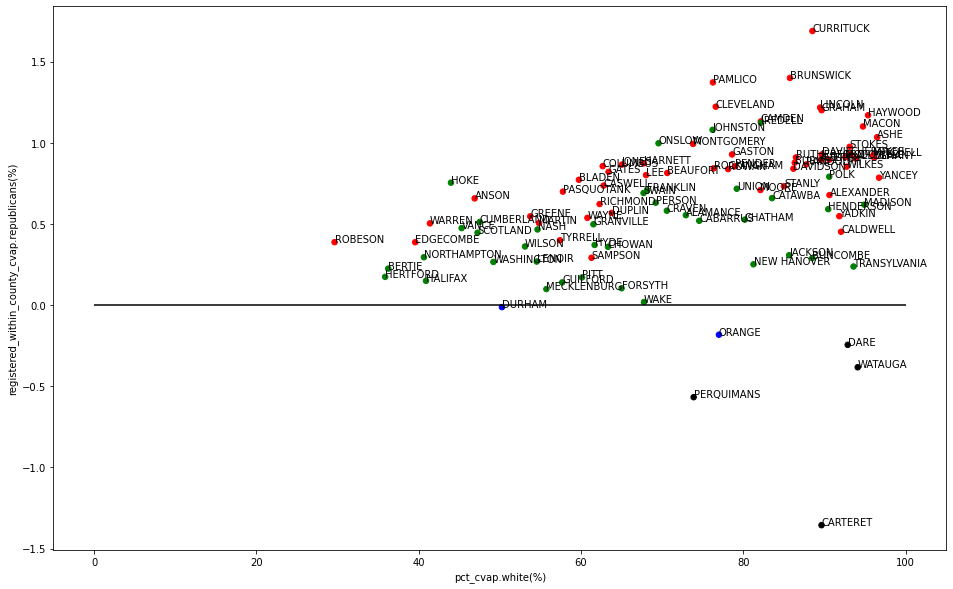

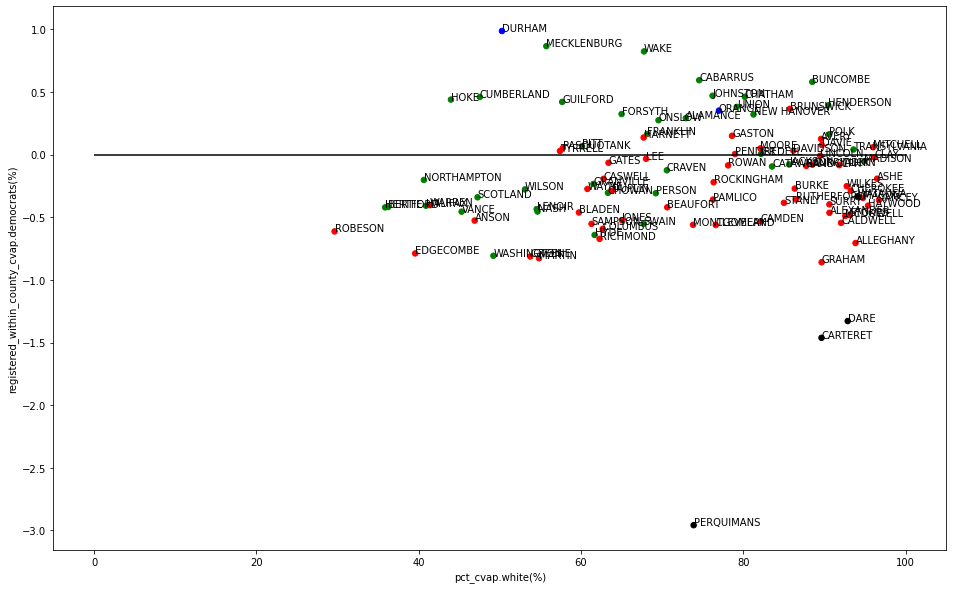

In [849]:
ax = recent.plot.scatter(y='registered_within_county_cvap.republicans(%)', 
                         x='pct_cvap.white(%)', 
                         c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)
recent[['pct_cvap.white(%)','registered_within_county_cvap.republicans(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
ax.hlines(0, 0, 100)
ax.get_figure().savefig('images/august2020_pct_republicans_vs_cvap_white.png')

ax = recent.plot.scatter(y='registered_within_county_cvap.democrats(%)', 
                         x='pct_cvap.white(%)', 
                         c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)
recent[['pct_cvap.white(%)','registered_within_county_cvap.democrats(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
ax.hlines(0, 0, 100)
ax.get_figure().savefig('images/august2020_pct_democrats_vs_cvap_white.png')

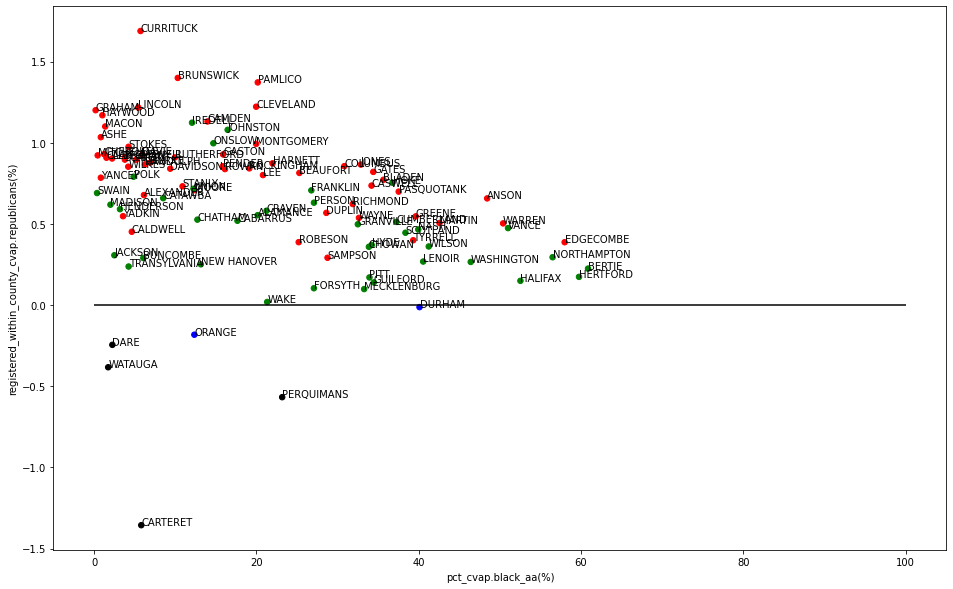

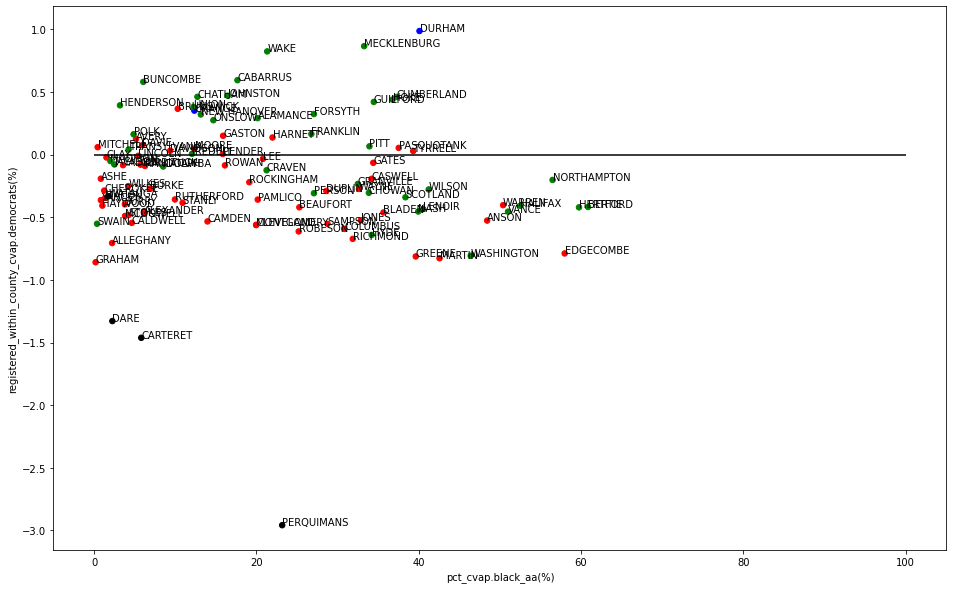

In [850]:
ax = recent.plot.scatter(y='registered_within_county_cvap.republicans(%)', 
                         x='pct_cvap.black_aa(%)', 
                         c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)
recent[['pct_cvap.black_aa(%)','registered_within_county_cvap.republicans(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
ax.hlines(0, 0, 100)
ax.get_figure().savefig('images/august2020_pct_republicans_vs_cvap_black_aa.png')

ax = recent.plot.scatter(y='registered_within_county_cvap.democrats(%)', 
                         x='pct_cvap.black_aa(%)', 
                         c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)
recent[['pct_cvap.black_aa(%)','registered_within_county_cvap.democrats(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
ax.hlines(0, 0, 100)
ax.get_figure().savefig('images/august2020_pct_democrats_vs_cvap_black_aa.png')

## party changes

In [120]:
party_changes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110717 entries, 0 to 110716
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   party_from        110717 non-null  object        
 1   party_to          110717 non-null  object        
 2   date              110717 non-null  datetime64[ns]
 3   event             110717 non-null  object        
 4   county_name       110717 non-null  object        
 5   net_democrats     110717 non-null  int64         
 6   net_republicans   110717 non-null  int64         
 7   net_unaffiliated  110717 non-null  int64         
 8   net_other         110717 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 7.6+ MB


In [138]:
party_changes

party_from      party_to       date                        event  \
0       unaffiliated     democrats 2020-01-13    unaffiliated-to-democrats   
1       unaffiliated     democrats 2020-01-13    unaffiliated-to-democrats   
2          democrats   republicans 2020-01-13     democrats-to-republicans   
3          democrats  unaffiliated 2020-01-13    democrats-to-unaffiliated   
4          democrats  unaffiliated 2020-01-13    democrats-to-unaffiliated   
...              ...           ...        ...                          ...   
110712   republicans  unaffiliated 2020-07-08  republicans-to-unaffiliated   
110713  unaffiliated   republicans 2020-07-08  unaffiliated-to-republicans   
110714     democrats   republicans 2020-07-08     democrats-to-republicans   
110715     democrats  unaffiliated 2020-07-08    democrats-to-unaffiliated   
110716     democrats  unaffiliated 2020-07-27    democrats-to-unaffiliated   

       county_name  net_democrats  net_republicans  net_unaffiliated  \
0         ALAMANCE              1                0                -1   
1         ALAMANCE              1                0                -1   
2         ALAMANCE             -1                1                 0   
3         ALAMANCE             -1                0                 1   
4         ALAMANCE             -1                0                 1   
...            ...            ...              ...               ...   
110712      YANCEY              0               -1                 1   
110713      YANCEY              0                1                -1   
110714      YANCEY             -1                1                 0   
110715      YANCEY             -1                0                 1   
110716      YANCEY             -1                0                 1   

        net_other  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
110712          0  
110713          0  
110714          0  
110715          0  
110716          0  

[110717 rows x 9 columns]

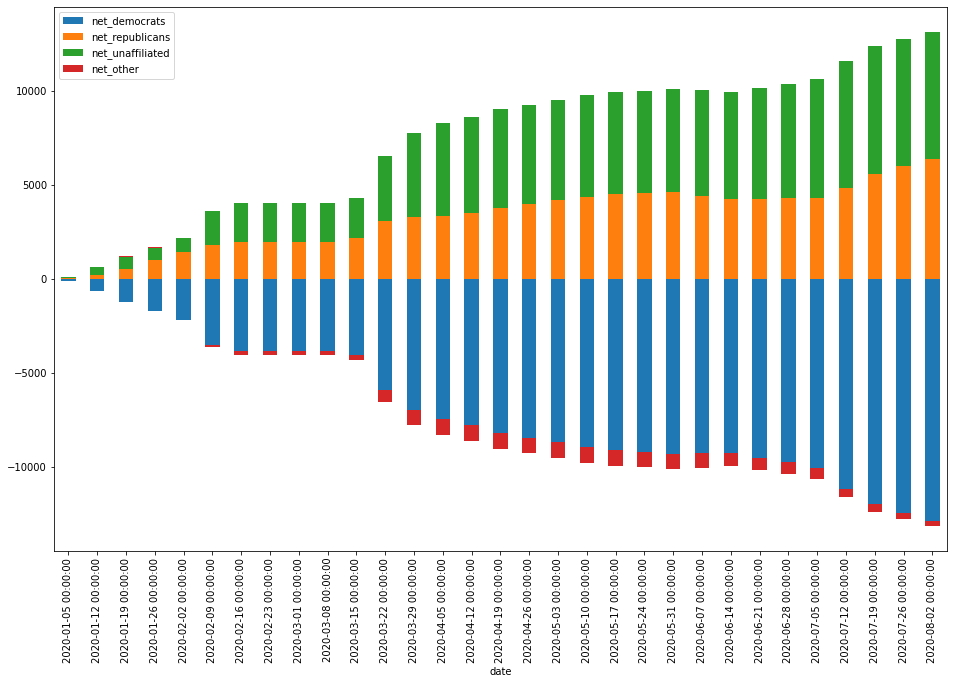

In [281]:
weekly = party_changes.groupby(pd.Grouper(key='date', freq='W'))[cols].sum()
weekly.cumsum().plot.bar(stacked=True)

In [669]:
def plot_changes(df, county_name):
    plt.figure()
    cols = ['net_democrats', 'net_republicans', 'net_unaffiliated', 'net_other']
    gg = df.groupby(pd.Grouper(key='date', freq='W-SUN'))[cols].sum()
    gg = pd.DataFrame(gg, index=pd.period_range('2020-02-28', '2020-07-31', freq='W-SAT').to_timestamp())
    ax = gg.plot.bar(stacked=True, color=['DeepSkyBlue', 'Tomato', 'LightGray', 'mediumseagreen'])
    ax.set_title('Weekly Party Affiliation Changes, since 02-28-2020')
    ax.set_ylabel('Net Change (count)')
    ax.set_xlabel('Date')
    ax.get_figure().savefig(f'assets/images/county-registration-changes/{county_name}.png', bbox_inches='tight')
    plt.close(ax.get_figure())
    
def plot_cumulative_changes(df, county_name):
    plt.figure()
    cols = ['net_democrats', 'net_republicans', 'net_unaffiliated', 'net_other']
    gg = df.groupby(pd.Grouper(key='date', freq='W-SUN'))[cols].sum().cumsum()
    gg = pd.DataFrame(gg, index=pd.period_range('2020-02-28', '2020-07-31', freq='W-SAT').to_timestamp())
    ax = gg.plot.bar(stacked=True, color=['DeepSkyBlue', 'Tomato', 'LightGray', 'mediumseagreen'])
    ax.set_title('Cumulative Party Affiliation Changes, since 02-28-2020')
    ax.set_ylabel('Net Change (count)')
    ax.set_xlabel('Date')
    ax.get_figure().savefig(f'assets/images/cumulative-county-registration-changes/{county_name}.png', bbox_inches='tight')
    plt.close(ax.get_figure())
    
def plot_gain_plus_changes(change, switches, name='Statewide'):
    aa = change.reset_index().groupby('date')[PARTIES].sum()
    aa['registered.other(count)'] = aa[['registered.libertarians(count)','registered.green(count)','registered.constitution(count)']].sum(axis=1)
    cols = ['net_democrats', 'net_republicans', 'net_unaffiliated', 'net_other']
    bb = switches[switches.date >= '2020-02-28'].groupby(pd.Grouper(key='date', freq='W-SAT'))[cols].sum().cumsum()    
    joined = aa.join(bb, how='outer').fillna(method='ffill')    
    fig, ax = plt.subplots(figsize=(16,10))    
    parties = {'democrats': 'Blue', 'republicans': 'Red', 
              'unaffiliated': 'Gray', 'other': 'mediumseagreen', 'total': 'Purple'}
    offset = -1
    for p in parties:
        ax.plot(joined.index, joined[f'registered.{p}(count)'].values, label=p.title(), color=parties[p])
        if p != 'total' and p != 'other':
            ax.bar(joined.index + pd.Timedelta(f'{offset} days'), joined[f'net_{p}'].values, 
                   color=parties[p], width=1.0, align='center', alpha=0.6)
            offset += 1
    plt.legend()    
    font_size = 16
    ax.set_title(f'Cumulative New Voter Registrations and Party Changes since 02-28-2020, {name}', size=font_size)
    ax.set_xlabel('Date', size = font_size)
    ax.set_ylabel('Registrants (count)', size = font_size)
    return ax, joined

<Figure size 1152x720 with 0 Axes>

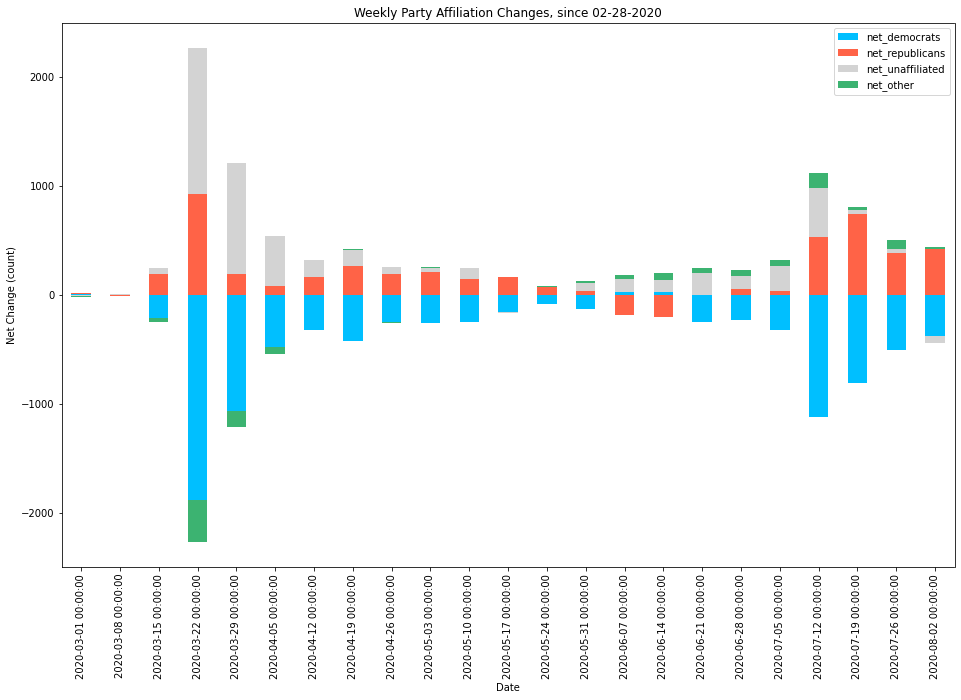

In [226]:
plt.figure()
gg = party_changes[party_changes.date >= '2020-02-28'].groupby(pd.Grouper(key='date', freq='W'))[cols].sum()
ax = gg.plot.bar(stacked=True, color=['DeepSkyBlue', 'Tomato', 'LightGray', 'mediumseagreen'])
ax.set_title('Weekly Party Affiliation Changes, since 02-28-2020')
ax.set_ylabel('Net Change (count)')
ax.set_xlabel('Date')
ax.get_figure().savefig('assets/images/weekly-party-affiliation-changes.png', bbox_inches='tight')
ax

<Figure size 1152x720 with 0 Axes>

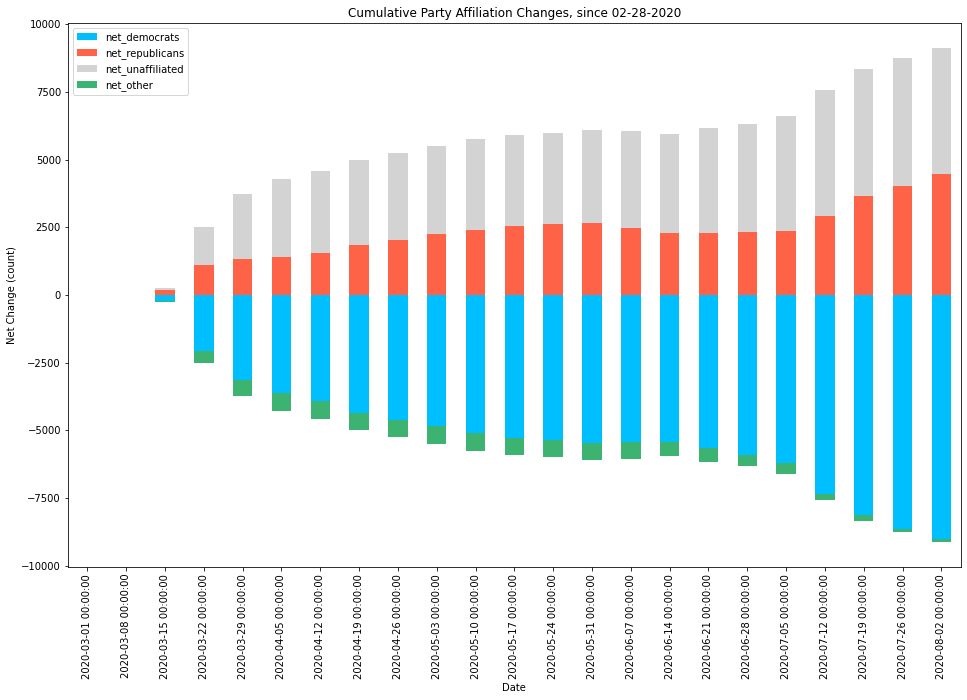

In [283]:
plt.figure()
gg = party_changes[party_changes.date >= '2020-02-28'].groupby(pd.Grouper(key='date', freq='W'))[cols].sum().cumsum()
ax = gg.plot.bar(stacked=True, color=['DeepSkyBlue', 'Tomato', 'LightGray', 'mediumseagreen'])
ax.set_title('Cumulative Party Affiliation Changes, since 02-28-2020')
ax.set_ylabel('Net Change (count)')
ax.set_xlabel('Date')
ax.get_figure().savefig('assets/images/cumulative-party-affiliation-changes.png', bbox_inches='tight')
ax

In [320]:
cols

['net_democrats', 'net_republicans', 'net_unaffiliated', 'net_other']

In [324]:
recent

registered.democrats(count) registered.republicans(count)  \
CountyName                                                              
TYRRELL                               0                            13   
HYDE                                -26                            20   
GRAHAM                              -67                            86   
JONES                               -43                            82   
CAMDEN                              -42                           101   
...                                 ...                           ...   
CUMBERLAND                         1199                          1302   
FORSYTH                             808                           221   
GUILFORD                           1696                           632   
MECKLENBURG                        6736                           978   
WAKE                               6412                           291   

            registered.libertarians(count) registered.green(count)  \
CountyName                                                           
TYRRELL                                  0                       0   
HYDE                                     1                       0   
GRAHAM                                  -4                       0   
JONES                                    7                       1   
CAMDEN                                  -3                       1   
...                                    ...                     ...   
CUMBERLAND                              92                      17   
FORSYTH                                 36                      10   
GUILFORD                                53                      29   
MECKLENBURG                            186                     100   
WAKE                                   141                      64   

            registered.constitution(count) registered.unaffiliated(count)  \
CountyName                                                                  
TYRRELL                                  1                             13   
HYDE                                     0                             44   
GRAHAM                                   2                             43   
JONES                                    0                             45   
CAMDEN                                   0                             93   
...                                    ...                            ...   
CUMBERLAND                              33                           1970   
FORSYTH                                 20                           1763   
GUILFORD                                20                           2558   
MECKLENBURG                             63                           8028   
WAKE                                    55                           9163   

            registered.white(count) registered.black(count)  \
CountyName                                                    
TYRRELL                           4                       3   
HYDE                              5                      -4   
GRAHAM                           31                       0   
JONES                            30                      -1   
CAMDEN                           69                      -1   
...                             ...                     ...   
CUMBERLAND                      596                     874   
FORSYTH                        -237                      94   
GUILFORD                        -78                     500   
MECKLENBURG                    2194                    2464   
WAKE                           1729                     778   

            registered.american_indian(count) registered.other(count)  ...  \
CountyName                                                             ...   
TYRRELL                                     0                      20  ...   
HYDE                                        0                      38  ...   
GRAHAM           

<Figure size 1152x720 with 0 Axes>

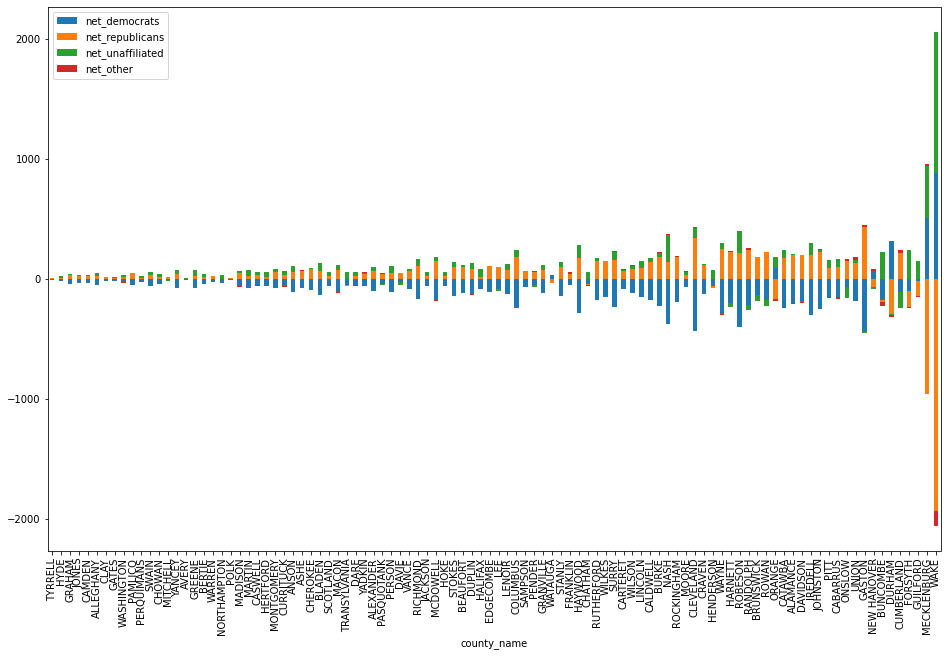

In [327]:
plt.figure()
gg = party_changes[party_changes.date >= '2020-02-28'].groupby('county_name')[cols].sum()
gg.join(recent['cvap.all_races(count)']).sort_values('cvap.all_races(count)')[cols].plot.bar(stacked=True)



#pd.Grouper(key='date', freq='W'))[cols].sum().cumsum()

In [286]:
for county_name, df in party_changes.groupby('county_name'):
    print(county_name)
    plot_changes(df[df.date >= '02-28-2020'], county_name.lower())
    plot_cumulative_changes(df[df.date >= '02-28-2020'], county_name.lower())

ALAMANCE
ALEXANDER
ALLEGHANY
ANSON
ASHE
AVERY
BEAUFORT
BERTIE
BLADEN
BRUNSWICK
BUNCOMBE
BURKE
CABARRUS
CALDWELL
CAMDEN
CARTERET
CASWELL
CATAWBA
CHATHAM
CHEROKEE
CHOWAN
CLAY
CLEVELAND
COLUMBUS
CRAVEN
CUMBERLAND
CURRITUCK
DARE
DAVIDSON
DAVIE
DUPLIN
DURHAM
EDGECOMBE
FORSYTH
FRANKLIN
GASTON
GATES
GRAHAM
GRANVILLE
GREENE
GUILFORD
HALIFAX
HARNETT
HAYWOOD
HENDERSON
HERTFORD
HOKE
HYDE
IREDELL
JACKSON
JOHNSTON
JONES
LEE
LENOIR
LINCOLN
MACON
MADISON
MARTIN
MCDOWELL
MECKLENBURG
MITCHELL
MONTGOMERY
MOORE
NASH
NEW HANOVER
NORTHAMPTON
ONSLOW
ORANGE
PAMLICO
PASQUOTANK
PENDER
PERQUIMANS
PERSON
PITT
POLK
RANDOLPH
RICHMOND
ROBESON
ROCKINGHAM
ROWAN
RUTHERFORD
SAMPSON
SCOTLAND
STANLY
STOKES
SURRY
SWAIN
TRANSYLVANIA
TYRRELL
UNION
VANCE
WAKE
WARREN
WASHINGTON
WATAUGA
WAYNE
WILKES
WILSON
YADKIN
YANCEY


<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

In [278]:
party_changes[party_changes.party_to == 'unaffiliated'].party_from.value_counts()

democrats       23503
republicans     19668
libertarians     1474
green             141
constitution      102
Name: party_from, dtype: int64

In [584]:
# Switches to republicans
# Switches to unaffiliated
# Switches to democrats
party_changes.event.value_counts()

democrats-to-unaffiliated       23503
unaffiliated-to-democrats       20187
republicans-to-unaffiliated     19668
democrats-to-republicans        16915
unaffiliated-to-republicans     16408
republicans-to-democrats         7033
libertarians-to-unaffiliated     1474
unaffiliated-to-libertarians     1080
libertarians-to-democrats         877
republicans-to-libertarians       723
libertarians-to-republicans       640
democrats-to-libertarians         514
unaffiliated-to-constitution      239
republicans-to-constitution       228
unaffiliated-to-green             213
democrats-to-green                181
green-to-unaffiliated             141
green-to-democrats                132
constitution-to-republicans       131
constitution-to-democrats         105
democrats-to-constitution         104
constitution-to-unaffiliated      102
republicans-to-green               44
libertarians-to-constitution       20
green-to-republicans               19
libertarians-to-green              16
constitution

In [606]:
d2r = party_changes[party_changes.event == 'democrats-to-republicans'].groupby('county_name').count().party_to.sort_values()
d2r

county_name
TYRRELL          3
MITCHELL        10
AVERY           11
HYDE            11
GATES           15
              ... 
FORSYTH        513
GUILFORD       526
CUMBERLAND     556
MECKLENBURG    704
WAKE           910
Name: party_to, Length: 100, dtype: int64

CountyName
ALAMANCE     Text(1.5644161393064597, 0.8228787265614461, '...
ALEXANDER    Text(0.3861904896157264, 2.1675454012888107, '...
ALLEGHANY    Text(0.11652217853577297, 2.252463632097607, '...
ANSON        Text(0.2689128998738868, 0.7090073896544837, '...
ASHE         Text(0.2869888108761947, 2.1106420795378806, '...
                                   ...                        
WAYNE        Text(1.1850378400311554, 1.2063426970131912, '...
WILKES       Text(0.7057698982393658, 2.4286062972907003, '...
WILSON       Text(0.7997916144230122, 0.5016293801032551, '...
YADKIN       Text(0.3819143226099565, 1.8369690011481057, '...
YANCEY       Text(0.18912259123310224, 1.1727559765448805, ...
Length: 100, dtype: object

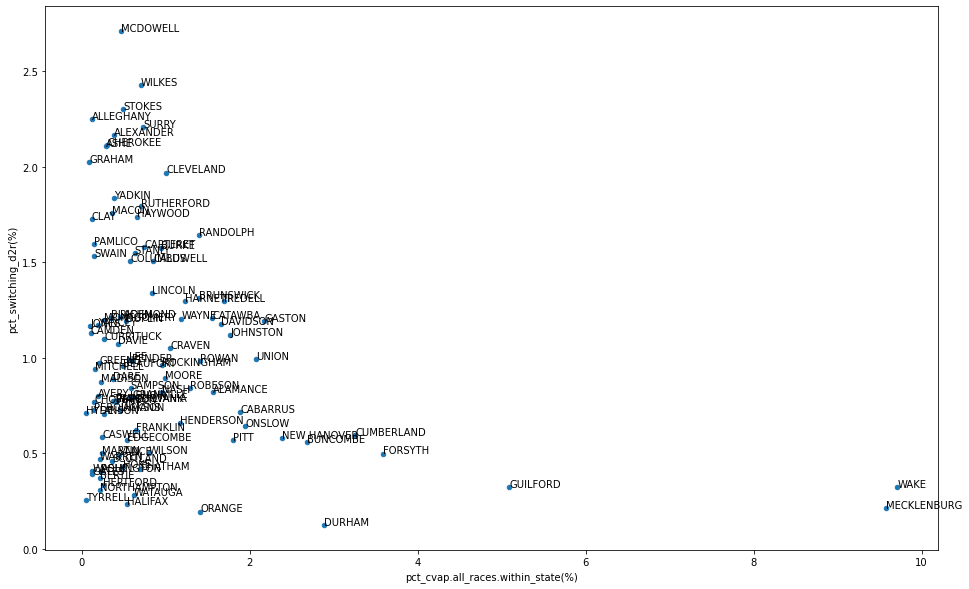

In [638]:
d2r = party_changes[party_changes.event == 'democrats-to-republicans'].groupby('county_name').count().party_to.sort_values()
foo = joined[joined.date == last_date][['registered.democrats(count)', 'CountyName', 'pct_cvap.all_races.within_state(%)']].set_index('CountyName', drop=False).join(d2r)
foo['pct_switching_d2r(%)'] = 100*foo['party_to'] / foo['registered.democrats(count)']
ax = foo.plot.scatter(x='pct_cvap.all_races.within_state(%)',y='pct_switching_d2r(%)')
foo[['pct_cvap.all_races.within_state(%)','pct_switching_d2r(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)

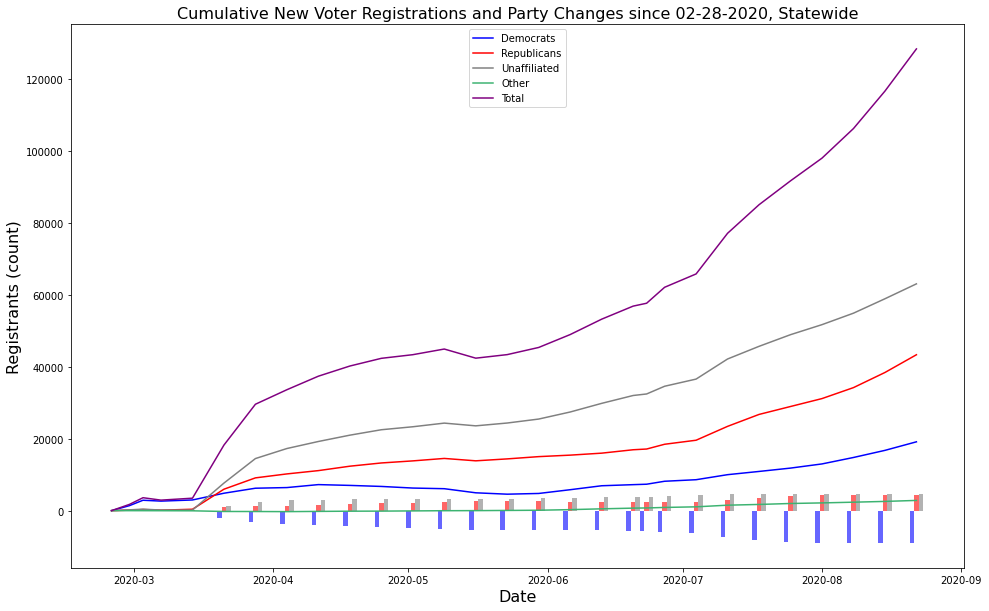

In [670]:
ax, idx = plot_gain_plus_changes(changes, party_changes)
ax.get_figure().savefig('assets/images/statewide-registrations-changes-by-party.png', bbox_inches='tight')

In [671]:
for county_name, df in party_changes.groupby('county_name'):
    print(county_name)
    ax, _ = plot_gain_plus_changes(changes[changes.CountyName == county_name], 
                                   party_changes[party_changes.county_name == county_name], 
                                   f'{county_name.title()} County')
    name = county_name.lower().replace(' ', '_')
    ax.get_figure().savefig(f'assets/images/county-registration-and-changes-by-party/{county_name.lower()}.png', 
                            bbox_inches='tight')
    plt.close(ax.get_figure())

ALAMANCE
ALEXANDER
ALLEGHANY
ANSON
ASHE
AVERY
BEAUFORT
BERTIE
BLADEN
BRUNSWICK
BUNCOMBE
BURKE
CABARRUS
CALDWELL
CAMDEN
CARTERET
CASWELL
CATAWBA
CHATHAM
CHEROKEE
CHOWAN
CLAY
CLEVELAND
COLUMBUS
CRAVEN
CUMBERLAND
CURRITUCK
DARE
DAVIDSON
DAVIE
DUPLIN
DURHAM
EDGECOMBE
FORSYTH
FRANKLIN
GASTON
GATES
GRAHAM
GRANVILLE
GREENE
GUILFORD
HALIFAX
HARNETT
HAYWOOD
HENDERSON
HERTFORD
HOKE
HYDE
IREDELL
JACKSON
JOHNSTON
JONES
LEE
LENOIR
LINCOLN
MACON
MADISON
MARTIN
MCDOWELL
MECKLENBURG
MITCHELL
MONTGOMERY
MOORE
NASH
NEW HANOVER
NORTHAMPTON
ONSLOW
ORANGE
PAMLICO
PASQUOTANK
PENDER
PERQUIMANS
PERSON
PITT
POLK
RANDOLPH
RICHMOND
ROBESON
ROCKINGHAM
ROWAN
RUTHERFORD
SAMPSON
SCOTLAND
STANLY
STOKES
SURRY
SWAIN
TRANSYLVANIA
TYRRELL
UNION
VANCE
WAKE
WARREN
WASHINGTON
WATAUGA
WAYNE
WILKES
WILSON
YADKIN
YANCEY


## Shapefiles

In [691]:
def load_shapefile():
    nc_shapefile = "data/shapefiles/NC_Counties-shp/counties.shp"
    nc_shape = gpd.read_file(nc_shapefile).set_index('CO_NAME')
    nc_shape['land.area(square_miles)'] = nc_shape['ACRES']/640.
    return nc_shape

nc_shape = load_shapefile()
nc_shape.head()

FID  OBJECTID      PERIMETER CO_ABBR          ACRES  \
CO_NAME                                                           
ROCKINGHAM    1       1.0  156472.984375    ROCK  366053.062500   
GUILFORD      2       2.0  166183.500000    GUIL  420968.937500   
ALAMANCE      3       3.0  143114.546875    ALAM  278127.031250   
ALEXANDER     4       4.0  116938.171875    ALEX  168640.984375   
RANDOLPH      5       5.0  180894.171875    RAND  505667.968750   

               Shape_Leng    RO     SHAPE_Le_1    SHAPE_Area  \
CO_NAME                                                        
ROCKINGHAM  513361.787377  WSRO  194502.424760  1.594526e+10   
GUILFORD    545220.367738  WSRO  205797.586927  1.833739e+10   
ALAMANCE    469534.986553  WSRO  177272.968717  1.211521e+10   
ALEXANDER   383654.655146   MRO  144599.548259  7.345997e+09   
RANDOLPH    593483.622166  WSRO  223033.815060  2.202688e+10   

                                                     geometry  \
CO_NAME                                                         
ROCKINGHAM  POLYGON ((-8853514.087 4333890.334, -8854417.1...   
GUILFORD    POLYGON ((-8909472.546 4336065.305, -8906846.4...   
ALAMANCE    POLYGON ((-8853514.087 4333890.334, -8853463.1...   
ALEXANDER   POLYGON ((-9020123.382 4306915.833, -9017719.5...   
RANDOLPH    POLYGON ((-8910804.874 4289745.058, -8906021.2...   

            land.area(square_miles)  
CO_NAME                              
ROCKINGHAM               571.957910  
GUILFORD                 657.763965  
ALAMANCE                 434.573486  
ALEXANDER                263.501538  
RANDOLPH                 790.106201

In [687]:
nc_shape.T['HYDE']

FID                                                          58
OBJECTID                                                     58
PERIMETER                                                309015
CO_ABBR                                                    HYDE
ACRES                                                    882041
Shape_Leng                                          1.01383e+06
RO                                                         WARO
SHAPE_Le_1                                               379792
SHAPE_Area                                          3.84217e+10
geometry      POLYGON ((-8531314.057 4260116.124799997, -852...
Name: HYDE, dtype: object

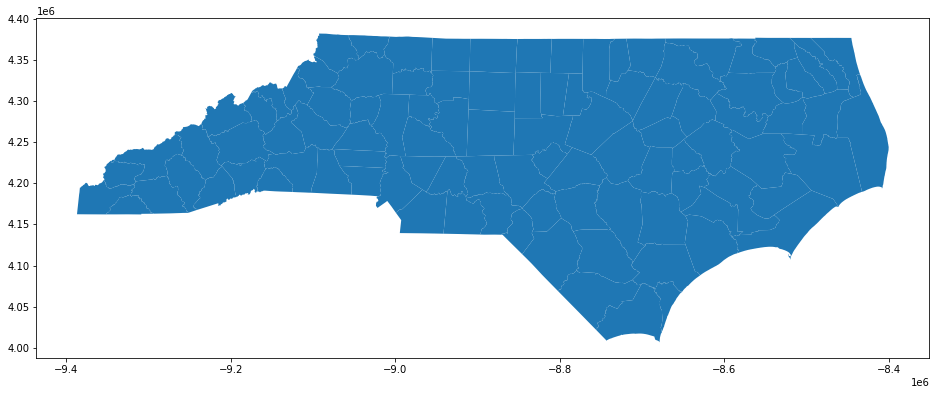

In [675]:
nc_shape.plot()

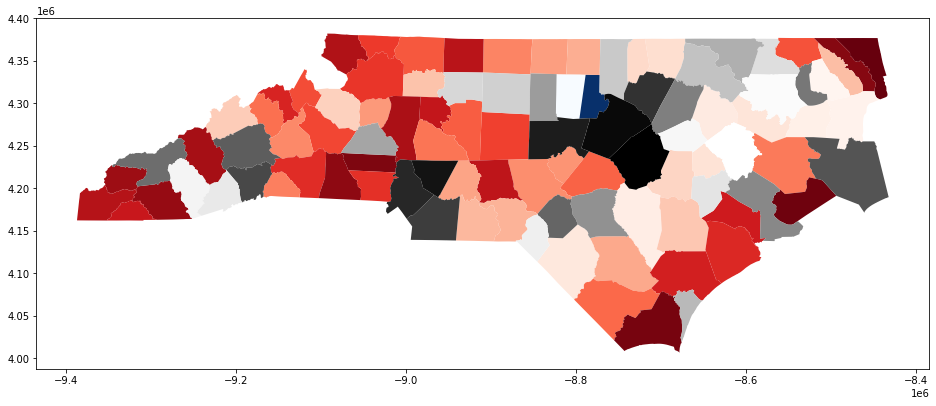

In [674]:
dat = changes.T[last_date].T.set_index('CountyName', drop=False)
to_plot = nc_shape.join(dat)
fig, ax = plt.subplots(1, 1)
to_plot[to_plot['most_new_registrants(party)'] == 'democrats'].plot(column='most_new_registered(%)', cmap='Blues', ax=ax)
to_plot[to_plot['most_new_registrants(party)'] == 'republicans'].plot(column='most_new_registered(%)', cmap='Reds', ax=ax)
to_plot[to_plot['most_new_registrants(party)'] == 'unaffiliated'].plot(column='most_new_registered(%)', cmap='Greys', ax=ax)

In [677]:
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure

from bokeh.io import output_notebook, push_notebook, show, output_file

output_notebook()


import json

Loading BokehJS ...

In [675]:
to_plot1 = to_plot.rename(columns = {'most_new_registrants(party)': 'party_with_most_new_registrants', 
                         'cvap.all_races(count)': 'population', 
                         'registered_within_county_cvap.democrats(%)': 'change_in_dem_pct'})
to_plot1['most_new_registrants(party)'] = to_plot1['party_with_most_new_registrants']

In [682]:
# TODO(mookerji): 
# - add library functions to make chloropleth, bivariate chloropleth, 
# - strip extra data out of geojson source

def create_geo_datasource(gdf):    
    json_data = json.dumps(json.loads(gdf.to_json()))
    return GeoJSONDataSource(geojson = json_data)

column = 'most_new_registered(%)'

geosource = create_geo_datasource(to_plot)
rep_geosource = create_geo_datasource(to_plot1[to_plot1['most_new_registrants(party)'] == 'republicans'])
rep_color_mapper = LinearColorMapper(palette = brewer['Reds'][8][::-1], 
                                     low = to_plot1[column].min(), 
                                     high = to_plot1[column].max())
dem_geosource = create_geo_datasource(to_plot1[to_plot1['most_new_registrants(party)'] == 'democrats'])
dem_color_mapper = LinearColorMapper(palette = brewer['Blues'][8][::-1],                                      
                                     low = to_plot1[column].min(), 
                                     high = to_plot1[column].max())
unk_geosource = create_geo_datasource(to_plot1[to_plot1['most_new_registrants(party)'] == 'unaffiliated'])
unk_color_mapper = LinearColorMapper(palette = brewer['Greys'][8][::-1], 
                                     low = to_plot1[column].min(), 
                                     high = to_plot1[column].max())
other_geosource = create_geo_datasource(to_plot1[(to_plot1['most_new_registrants(party)'] == 'green') | (to_plot['most_new_registrants(party)'] == 'constitution')])
other_color_mapper = LinearColorMapper(palette = brewer['Greens'][8][::-1], 
                                     low = to_plot1[column].min(), 
                                     high = to_plot1[column].max())


color_bar = lambda t: ColorBar(color_mapper=t,  label_standoff=8, width=500, height=10,  location=(0,0), orientation='horizontal')

p = figure(plot_height=375 , plot_width=850, toolbar_location='right')    
p.patches('xs','ys', source=rep_geosource, fill_alpha=1, line_width=0.5, line_color='black', 
          fill_color={'field' : column , 'transform': rep_color_mapper})

p.patches('xs','ys', source=dem_geosource, fill_alpha=1, line_width=0.5, line_color='black', 
          fill_color={'field' : column , 'transform': dem_color_mapper})
p.patches('xs','ys', source=unk_geosource, fill_alpha=1, line_width=0.5, line_color='black',           
          fill_color={'field' : column , 'transform': unk_color_mapper})

p.patches('xs','ys', source=other_geosource, fill_alpha=1, line_width=0.5, line_color='black', 
          fill_color={'field' : column , 'transform': other_color_mapper})

p.add_layout(color_bar(rep_color_mapper), 'below')
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.axis.visible = False

p.add_tools(HoverTool(tooltips = [('County','@CountyName'), 
                                  ('Population', '@population'), 
                                  ('Winning Registrations', '@party_with_most_new_registrants'),
                                  ('Dem. Reg. Change (%)', '@change_in_dem_pct')
                                 ]))
show(p)

In [679]:
to_plot['most_new_registrants(party)'].value_counts()

republicans     63
unaffiliated    32
democrats        2
green            2
constitution     1
Name: most_new_registrants(party), dtype: int64

In [680]:
p.output_file('images/august2020-pct-change.html')

AttributeError: 'Figure' object has no attribute 'output_file'

In [681]:
output_file('images/august2020-pct-change.html', mode='inline')

## VBM

In [882]:
ls -lah limbo/

total 13064
drwxr-xr-x   5 mookerji  staff   160B Aug 29 20:52 ./
drwxr-xr-x  31 mookerji  staff   992B Aug 30 16:52 ../
-rw-r--r--@  1 mookerji  staff   6.4M Aug 29 20:52 absentee_demo_stats_20201103.csv
-rw-r--r--   1 mookerji  staff   6.1K Aug 29 20:29 notes.md
-rw-r--r--   1 mookerji  staff   6.0K Aug 21 19:36 notes.md~


In [1070]:
def read_absentee(start_date = '2020-01-01'):
    df = pd.read_csv('limbo/absentee_demo_stats_20201103.csv', parse_dates=['election_dt'])
    df['request_week_date'] = pd.to_datetime('2020-01-01') + df['request_week_num'].apply(lambda t: pd.Timedelta(weeks=t))
    df = df[(df['request_week_date'] <= pd.datetime.now()) & (df['request_week_date'] >= start_date)]
    other = ['GREEN', 'LIBERTARIAN', 'CONSTITUTION']
    df['party_desc'] = df['party_desc'].apply(lambda t: 'other' if t in other else t)   
    return df.sort_values(by='request_week_date')

In [1071]:
absentee = read_absentee()
absentee.head()

county_id  county_name election_dt    party_desc     race_desc  \
62019         92         WAKE  2020-11-03    DEMOCRATIC  UNDESIGNATED   
65815         92         WAKE  2020-11-03  UNAFFILIATED         WHITE   
62841         92         WAKE  2020-11-03         other         WHITE   
27121         41     GUILFORD  2020-11-03  UNAFFILIATED         WHITE   
41366         60  MECKLENBURG  2020-11-03  UNAFFILIATED         WHITE   

                    ethncity_desc gender_desc    age_range  request_year  \
62019                UNDESIGNATED        MALE  Age 26 - 40          2020   
65815                UNDESIGNATED        MALE  Age 26 - 40          2020   
62841                UNDESIGNATED      FEMALE  Age 26 - 40          2020   
27121  NOT HISPANIC or NOT LATINO      FEMALE  Age 26 - 40          2020   
41366                UNDESIGNATED      FEMALE  Age 18 - 25          2020   

       request_week_num  group_count request_week_date  
62019                 1            2        2020-01-08  
65815                 1            1        2020-01-08  
62841                 1            1        2020-01-08  
27121                 1            1        2020-01-08  
41366                 1            1        2020-01-08

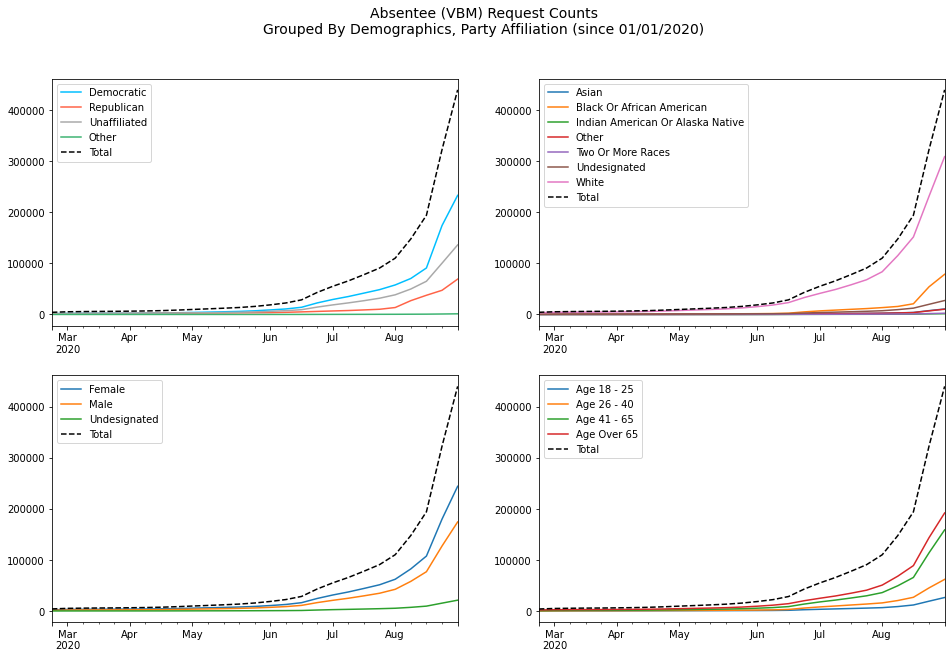

In [1072]:
def plot_vm_counts(absentee, start_date='2020-02-25'):
    col_types = ['party_desc', 'race_desc', 'gender_desc', 'age_range']
    figure, axs = plt.subplots(2,2)
    axs = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]
    ax_index = 0
    for col_type in col_types: 
        colors = {'Democratic': 'DeepSkyBlue', 'Republican': 'Tomato', 'Unaffiliated': 'DarkGray', 'Other': 'mediumseagreen'}   
        for group in np.sort(absentee[col_type].unique()):
            grouped = absentee[absentee[col_type] == group].groupby(pd.Grouper(key='request_week_date', freq='W-SAT'))
            cumulative = grouped['group_count'].sum().cumsum()
            cumulative = cumulative[cumulative.index >= start_date]
            label = group.title()
            if col_type == 'party_desc':   
                cumulative.plot(label=label, color=colors.get(group.title()), ax=axs[ax_index])
            else:
                cumulative.plot(label=label, ax=axs[ax_index])
        grouped = absentee.groupby(pd.Grouper(key='request_week_date', freq='W-SAT'))
        cumulative = grouped['group_count'].sum().cumsum()
        cumulative = cumulative[cumulative.index >= start_date]
        cumulative.plot(label='Total', color='Black', ax=axs[ax_index], style='--')
        axs[ax_index].legend()
        axs[ax_index].set_xlabel('')
        ax_index += 1    
    figure.suptitle('Absentee (VBM) Request Counts\nGrouped By Demographics, Party Affiliation (since 01/01/2020)', fontsize=14)
    return figure

figure = plot_vm_counts(absentee)
figure.savefig('assets/images/statewide-vbm-requests-by-demographic.png', bbox_inches='tight')

In [1073]:
absentee.groupby(['party_desc', 'race_desc', 'gender_desc', 'age_range']).group_count.sum().nlargest(n=30)

party_desc    race_desc                  gender_desc   age_range  
DEMOCRATIC    WHITE                      FEMALE        Age Over 65    45121
                                                       Age 41 - 65    29026
                                         MALE          Age Over 65    27213
UNAFFILIATED  WHITE                      FEMALE        Age Over 65    22199
                                         MALE          Age Over 65    19828
                                         FEMALE        Age 41 - 65    18932
REPUBLICAN    WHITE                      FEMALE        Age Over 65    18421
DEMOCRATIC    BLACK or AFRICAN AMERICAN  FEMALE        Age Over 65    18120
                                                       Age 41 - 65    17185
UNAFFILIATED  WHITE                      MALE          Age 41 - 65    16422
DEMOCRATIC    WHITE                      MALE          Age 41 - 65    15980
REPUBLICAN    WHITE                      MALE          Age Over 65    14508
DEMOCRATIC    WHITE  

In [979]:
recent['cvap.density(count/squaremiles)']

CountyName
HYDE           2.94009
TYRRELL        5.75838
JONES          16.0676
PAMLICO        18.8233
SWAIN          20.1266
                ...   
FORSYTH        644.266
DURHAM         715.989
NEW HANOVER    805.316
WAKE           840.707
MECKLENBURG    1291.35
Name: cvap.density(count/squaremiles), Length: 100, dtype: object

In [1074]:
def normalize_absentee(absentee):
    dfs = []
    for county_name in absentee.county_name.unique():
        county = absentee[absentee.county_name == county_name]
        if county.empty:
            print('empty!')
            dfs.append([])
        counts = county.groupby(pd.Grouper(key='request_week_date', freq='W-SAT')).apply(lambda t: t.groupby('party_desc').group_count.sum())
        if isinstance(counts.index, pd.MultiIndex):
            counts = counts.reset_index().pivot(index='request_week_date', columns='party_desc', values='group_count')    
        counts['county_name'] = county_name
        counts['date'] = counts.index
        dfs.append(counts)
    return pd.concat(dfs)

def get_cumulative_absentee_by_county(county_absentee):
    counties = []
    for county_name, county in county_absentee.groupby('county_name'):
        tmp = county[['DEMOCRATIC', 'REPUBLICAN', 'UNAFFILIATED', 'other']].cumsum().tail(1)
        tmp['county_name'] = county_name
        counties.append(tmp)
    return pd.concat(counties).set_index('county_name')

county_absentee = normalize_absentee(absentee)
latest_absentee = get_cumulative_absentee_by_county(county_absentee)
latest_absentee = latest_absentee.join(recent['cvap.density(count/squaremiles)'])

In [1075]:
latest_absentee

DEMOCRATIC  REPUBLICAN  UNAFFILIATED  other  \
county_name                                                
ALAMANCE         3100.0       921.0        1594.0   12.0   
ALEXANDER         285.0       153.0         179.0    1.0   
ALLEGHANY         110.0        67.0          75.0    NaN   
ANSON             297.0        45.0          58.0    NaN   
ASHE              199.0        93.0          98.0    3.0   
...                 ...         ...           ...    ...   
WAYNE            1758.0       519.0         518.0    7.0   
WILKES            744.0       598.0         405.0    9.0   
WILSON           1296.0       312.0         386.0    NaN   
YADKIN            265.0       288.0         216.0    NaN   
YANCEY            328.0       121.0         149.0    NaN   

            cvap.density(count/squaremiles)  
county_name                                  
ALAMANCE                            266.866  
ALEXANDER                           108.648  
ALLEGHANY                            36.854  
ANSON                                37.135  
ASHE                                49.7128  
...                                     ...  
WAYNE                               157.723  
WILKES                              68.9421  
WILSON                              158.443  
YADKIN                              83.8321  
YANCEY                              44.7868  

[98 rows x 5 columns]

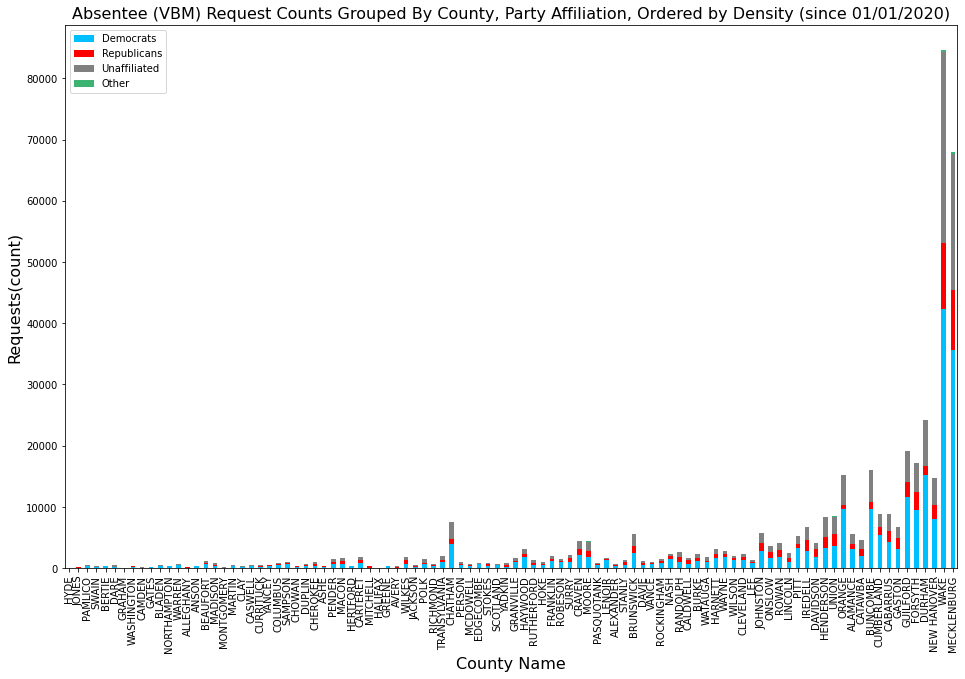

In [1079]:
def plot_density_absentees(latest_absentee):
    latest_absentee = latest_absentee.sort_values('cvap.density(count/squaremiles)')
    to_plot = {'DEMOCRATIC': 'Democrats',
               'REPUBLICAN': 'Republicans',
               'UNAFFILIATED': 'Unaffiliated',
               'other': 'Other'}
    ax = latest_absentee[to_plot.keys()].rename(columns=to_plot).plot.bar(stacked=True, color=['DeepSkyBlue', 'Red', 'Gray', 'mediumseagreen'])
    fontsize=16
    ax.set_title('Absentee (VBM) Request Counts Grouped By County, Party Affiliation, Ordered by Density (since 01/01/2020)', 
                 fontsize=fontsize)
    ax.set_ylabel('Requests(count)', fontsize=fontsize)
    ax.set_xlabel('County Name', fontsize=fontsize)
    return ax

ax = plot_density_absentees(latest_absentee)
ax.get_figure().savefig('assets/images/statewide-vbm-requests-by-county.png', bbox_inches='tight')